### Parkinsons data analysis using Ensemble Techniques

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from mlxtend.plotting import plot_decision_regions
from plotly import subplots


### Loading the dataset

In [2]:
parkinsondf = pd.read_csv('parkinsons.data')

In [3]:
#printing sample data
parkinsondf.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### Exploring data

In [4]:
##info about data
parkinsondf.shape


(195, 24)

* parkinson data has 195 rows and 24 columns. Amoung 24 columns there are 23 features and 1 target variable


In [5]:
#info about the datatypes
parkinsondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

*Parkinson has different data types of int , float and object as below
name : Object ,MDVP:Fo(Hz) float64,MDVP:Fhi(Hz) float64,MDVP:Flo(Hz) float64,MDVP:Jitter(%) float64,MDVP:Jitter(Abs)float64
MDVP:RAP float64,MDVP:PPQ float64,Jitter:DDP float64,MDVP:Shimmer float64,MDVP:Shimmer(dB) float64,Shimmer:APQ3 float64
Shimmer:APQ5 float64,MDVP:APQ float64,Shimmer:DDA float64,NHR float64,HNR float64,status int64,RPDE float64
DFA float64,spread1 float64,spread2 float64,D2 float64,PPE float64

In [6]:
#checking if dataset contains any null values
parkinsondf.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Observation :: Parkinson dataset does not contain any null values

In [7]:
#Grouping the dataset according to two different classes
parkinsondf.groupby(['status']).count()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


Observation :Model has two status zero and one. The status distribution is in the ratio 1:3 . The decision tree is used to diagonise the status of the patient whether they have PD or not

Check if the feature has any other value apart from numeric

In [8]:
parkinsondf.applymap(np.isreal)
##parkinsondf.applymap(lambda x: isinstance(x,(int,float)))

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Convert object into categorical value if any present in the dataset

In [9]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in parkinsondf.columns:# Loop through all columns in the dataframe
    if parkinsondf[feature].dtype == 'object': # Only apply for columns with categorical strings
        parkinsondf[feature] = pd.Categorical(parkinsondf[feature]).codes # Replace strings with an integer

print('shape of dataframe after coversion is :')
print(parkinsondf.dtypes)
print('Sample dataframe is:')
parkinsondf.head(10)

shape of dataframe after coversion is :
name                  int16
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object
Sample dataframe is:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### Univariate , bivariate analysis on parkinsons data

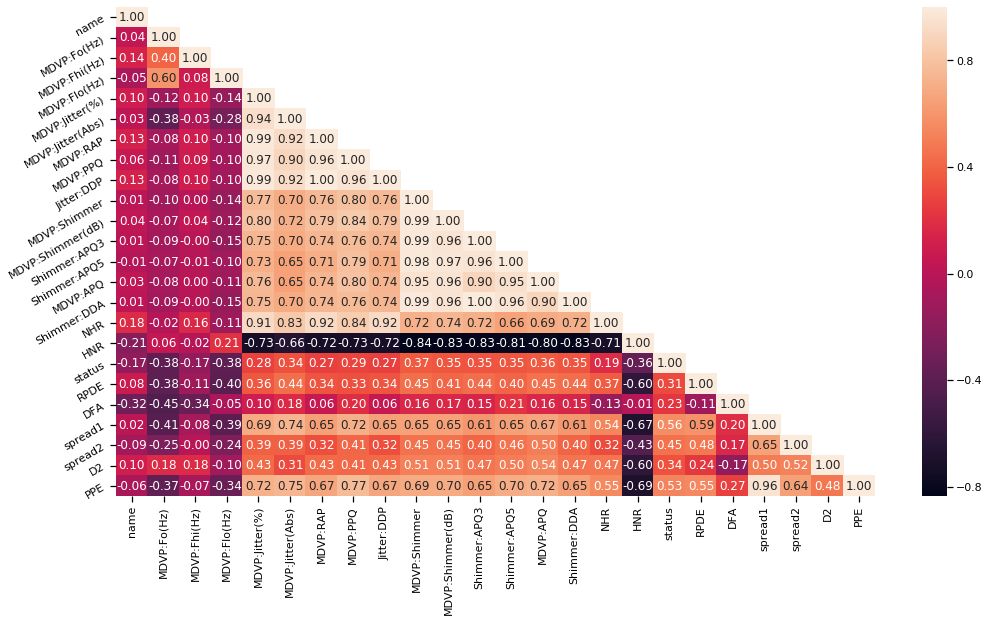

In [10]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(17,9))
# create a mask so we only see the correlation values once
mask = np.zeros_like(parkinsondf.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(parkinsondf.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* MDVP:Jitter(Abs) is highly correlated with MDVP:Jitter(%)
* MDVP:RAP is highly correlated with MDVP:Jitter(Abs) and MDVP:Jitter(%)
* MDVP:PPQ is highly correlated with MDVP:RAP , MDVP:Jitter(Abs) and MDVP:Jitter(%)
* Jitter:DDP is very highly correated with MDVP:RAP and highly correlated with  MDVP:Jitter(Abs) and MDVP:Jitter(%)
* PPE is highly correlated with spread1 .Also moderately correlated with Jitter(%), Jitter(ABS) , RAP,PPQ , Shimmer(DB),APQ5,APQ moderately correlated with status 
* NHR is highly correlated with Jitter(%),jitter(ABS),RAP,PPQ,DDP
* Status is averagely correlated with PPE and spread1
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency are  highly correlated with each other
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude are  correlated with each other

In [11]:
parkinsondf.corr()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,1.000000,0.035996,0.138838,-0.054709,0.103386,0.032092,0.129494,0.061538,0.129525,0.011911,...,0.013474,0.177582,-0.214318,-0.167497,0.081444,-0.315645,0.018943,-0.093673,0.101137,-0.060412
MDVP:Fo(Hz),0.035996,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.138838,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),-0.054709,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),0.103386,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),0.032092,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,0.129494,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,0.061538,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,0.129525,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,0.011911,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771


Findind the central value , interquartile 25% , 75% of parkinsondata

In [12]:
parkinsondf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
name,195.0,97.000000,56.435804,0.000000,48.500000,97.000000,145.500000,194.000000
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080


 * Mean , Median ,25% ,75% , min, maximum  and std deviation of parkinson data features can be found

Finding the detailed individual mean ,median,skew and kurtosis

Distribution of average,minimum, maximum fundamental frequency 

In [150]:
quartiles = np.percentile(parkinsondf['MDVP:Fo(Hz)'],[25,50,75])
Fo_max, Fo_min = parkinsondf['MDVP:Fo(Hz)'].max(), parkinsondf['MDVP:Fo(Hz)'].min()
print('interquartile(Q1) of average fundamental freuency MDVP:Fo(Hz) is %.3f' % quartiles[0])
print('Median of naverage fundamental freuency MDVP:Fo(Hz) is: %.3f' % quartiles[1])
print('interquartile(Q3) of average fundamental freuency MDVP:Fo(Hz) is : %.3f' % quartiles[2])
print('Maximum of MDVP:Fo(Hz): %.3f' % Fo_max)
print('Minimum of MDVP:Fo(Hz): %.3f' % Fo_min)
print('skew of MDVP:Fo(Hz) is',parkinsondf['MDVP:Fo(Hz)'].skew())
print('kurtosis of MDVP:Fo(Hz) is',parkinsondf['MDVP:Fo(Hz)'].kurtosis())
print('mean of average fundamental freuency  MDVP:Fo(Hz)  is',parkinsondf['MDVP:Fo(Hz)'].mean())
print('Std deviation of average fundamental freuency  MDVP:Fo(Hz)  is',parkinsondf['MDVP:Fo(Hz)'].std())
print('variance of average fundamental freuency  MDVP:Fo(Hz)  is',parkinsondf['MDVP:Fo(Hz)'].var())

interquartile(Q1) of average fundamental freuency MDVP:Fo(Hz) is 117.572
Median of naverage fundamental freuency MDVP:Fo(Hz) is: 148.790
interquartile(Q3) of average fundamental freuency MDVP:Fo(Hz) is : 182.769
Maximum of MDVP:Fo(Hz): 260.105
Minimum of MDVP:Fo(Hz): 88.333
skew of MDVP:Fo(Hz) is 0.5917374636540784
kurtosis of MDVP:Fo(Hz) is -0.6278981066788805
mean of average fundamental freuency  MDVP:Fo(Hz)  is 154.22864102564105
Std deviation of average fundamental freuency  MDVP:Fo(Hz)  is 41.39006474907147
variance of average fundamental freuency  MDVP:Fo(Hz)  is 1713.1374599323287


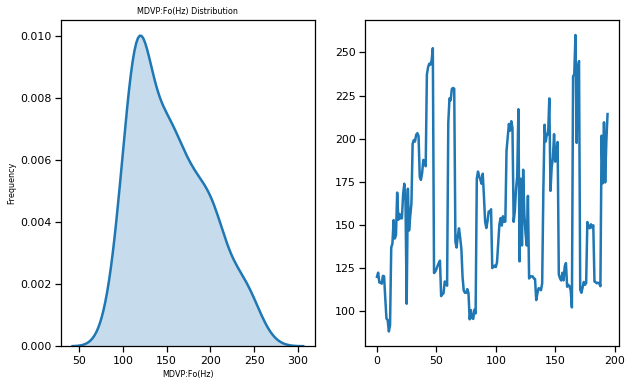

In [14]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:Fo(Hz)'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:Fo(Hz)", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:Fo(Hz) Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:Fo(Hz)'].values.tolist())


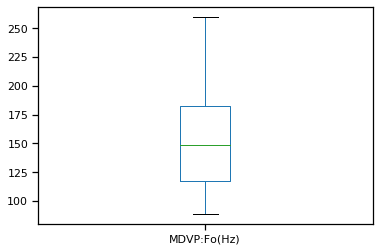

In [15]:
parkinsondf['MDVP:Fo(Hz)'].plot(kind='box')

Observation :From the graph we could observer that average vocal fundamental frequency MDVP:Fo(Hz) is skewed towards right. tail can be observed on the right side . We could also observe the frequency from the second graph

In [149]:
quartiles = np.percentile(parkinsondf['MDVP:Fhi(Hz)'],[25,50,75])
Fhi_max, Fhi_min = parkinsondf['MDVP:Fhi(Hz)'].max(), parkinsondf['MDVP:Fhi(Hz)'].min()
print('interquartile(Q1) of Maximum fundamental freuency MDVP:Fhi(Hz) is %.3f' % quartiles[0])
print('Median of Maximum fundamental freuency MDVP:Fhi(Hz) is: %.3f' % quartiles[1])
print('interquartile(Q3) of Maximum fundamental freuency MDVP:Fhi(Hz) is : %.3f' % quartiles[2])
print('Maximum of MDVP:Fhi(Hz): %.3f' % Fhi_max)
print('Minimum of MDVP:Fhi(Hz): %.3f' % Fhi_min)
print('skew of MDVP:Fhi(Hz) is',parkinsondf['MDVP:Fhi(Hz)'].skew())
print('kurtosis of MDVP:Fo(Hz) is',parkinsondf['MDVP:Fhi(Hz)'].kurtosis())
print('mean of Maximum fundamental freuency  MDVP:Fhi(Hz)  is',parkinsondf['MDVP:Fhi(Hz)'].mean())
print('Std deviation of Maximum fundamental freuency  MDVP:Fhi(Hz)  is',parkinsondf['MDVP:Fhi(Hz)'].std())
print('variance of average fundamental freuency  MDVP:Fhi(Hz)  is',parkinsondf['MDVP:Fhi(Hz)'].var())

interquartile(Q1) of Maximum fundamental freuency MDVP:Fhi(Hz) is 134.863
Median of Maximum fundamental freuency MDVP:Fhi(Hz) is: 175.829
interquartile(Q3) of Maximum fundamental freuency MDVP:Fhi(Hz) is : 224.206
Maximum of MDVP:Fhi(Hz): 592.030
Minimum of MDVP:Fhi(Hz): 102.145
skew of MDVP:Fhi(Hz) is 2.542145997588398
kurtosis of MDVP:Fo(Hz) is 7.627241211631889
mean of Maximum fundamental freuency  MDVP:Fhi(Hz)  is 197.104917948718
Std deviation of Maximum fundamental freuency  MDVP:Fhi(Hz)  is 91.49154763503036
variance of average fundamental freuency  MDVP:Fhi(Hz)  is 8370.703288653029


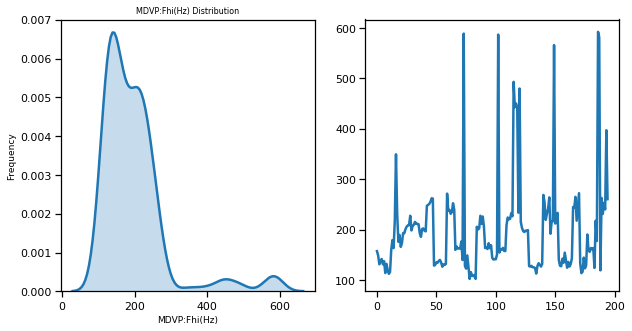

In [17]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,5)
sns.kdeplot(parkinsondf['MDVP:Fhi(Hz)'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:Fhi(Hz)", fontsize=9) 
ax11.set_ylabel("Frequency", fontsize=9)
ax11.set_title("MDVP:Fhi(Hz) Distribution", fontsize=8)

ax12 = plt.plot(parkinsondf['MDVP:Fhi(Hz)'].values.tolist())

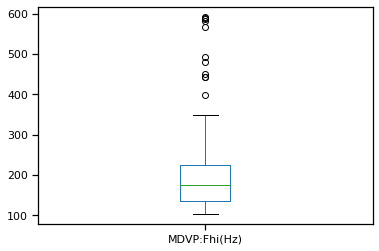

In [18]:
parkinsondf['MDVP:Fhi(Hz)'].plot(kind='box')

 Observation :Maximum vocal fundamental frequency moderately normaly distributed and is highly skewed towards right.From the box plot we could see outliers in the dataset

In [148]:
quartiles = np.percentile(parkinsondf['MDVP:Flo(Hz)'],[25,50,75])
Flo_max, Flo_min = parkinsondf['MDVP:Flo(Hz)'].max(), parkinsondf['MDVP:Flo(Hz)'].min()
print('interquartile(Q1) of average fundamental freuency MDVP:Flo(Hz) is %.3f' % quartiles[0])
print('Median of naverage fundamental freuency MDVP:Flo(Hz) is: %.3f' % quartiles[1])
print('interquartile(Q3) of average fundamental freuency MDVP:Flo(Hz) is : %.3f' % quartiles[2])
print('Maximum of MDVP:Flo(Hz): %.3f' % Flo_max)
print('Minimum of MDVP:Flo(Hz): %.3f' % Flo_min)
print('skew of MDVP:Flo(Hz) is',parkinsondf['MDVP:Flo(Hz)'].skew())
print('kurtosis of MDVP:Flo(Hz) is',parkinsondf['MDVP:Flo(Hz)'].kurtosis())
print('mean of average fundamental freuency  MDVP:Flo(Hz)  is',parkinsondf['MDVP:Flo(Hz)'].mean())
print('Std deviation of average fundamental freuency  MDVP:Flo(Hz)  is',parkinsondf['MDVP:Flo(Hz)'].std())
print('variance of average fundamental freuency  MDVP:Flo(Hz)  is',parkinsondf['MDVP:Flo(Hz)'].var())

interquartile(Q1) of average fundamental freuency MDVP:Flo(Hz) is 84.291
Median of naverage fundamental freuency MDVP:Flo(Hz) is: 104.315
interquartile(Q3) of average fundamental freuency MDVP:Flo(Hz) is : 140.019
Maximum of MDVP:Flo(Hz): 239.170
Minimum of MDVP:Flo(Hz): 65.476
skew of MDVP:Flo(Hz) is 1.217350448627808
kurtosis of MDVP:Flo(Hz) is 0.6546145211395396
mean of average fundamental freuency  MDVP:Flo(Hz)  is 116.32463076923077
Std deviation of average fundamental freuency  MDVP:Flo(Hz)  is 43.521413181993644
variance of average fundamental freuency  MDVP:Flo(Hz)  is 1894.1134053578098


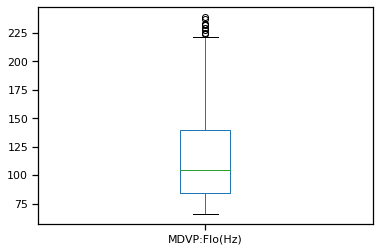

In [20]:
parkinsondf['MDVP:Flo(Hz)'].plot(kind='box')

Observation :The minimum vocal frequency is moderately normaly distributed which is highy skewed towards right with some outliers

Distribution of variation in fundamental frequency

In [146]:
quartiles = np.percentile(parkinsondf['MDVP:Jitter(%)'],[25,50,75])
jitterper_max, jitterper_min = parkinsondf['MDVP:Jitter(%)'].max(), parkinsondf['MDVP:Jitter(%)'].min()
print('interquartile(Q1) of variation in fundamental frequency MDVP:Jitter(%) is ', quartiles[0])
print('Median of variation in fundamental frequency MDVP:Jitter(%) is: %.3f' ,quartiles[1])
print('interquartile(Q3) of variation in fundamental frequency MDVP:Jitter(%) is :' , quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of MDVP:Jitter(%): is' , jitterper_max)
print('Minimum of MDVP:Jitter(%): is' , jitterper_min)
print('skew of MDVP:Jitter(%) is',parkinsondf['MDVP:Jitter(%)'].skew())
print('kurtosis of MDVP:Jitter(%) is',parkinsondf['MDVP:Jitter(%)'].kurtosis())
print('mean of variation in fundamental frequency  MDVP:Jitter(%)  is',parkinsondf['MDVP:Jitter(%)'].mean())
print('Std deviation of variation in fundamental frequency MDVP:Jitter(%)  is',parkinsondf['MDVP:Jitter(%)'].std())

interquartile(Q1) of variation in fundamental frequency MDVP:Jitter(%) is  0.00346
Median of variation in fundamental frequency MDVP:Jitter(%) is: %.3f 0.00494
interquartile(Q3) of variation in fundamental frequency MDVP:Jitter(%) is : 0.007365
IQR is: 0.003905
Maximum of MDVP:Jitter(%): is 0.03316
Minimum of MDVP:Jitter(%): is 0.00168
skew of MDVP:Jitter(%) is 3.0849462014441817
kurtosis of MDVP:Jitter(%) is 12.030939276179508
mean of variation in fundamental frequency  MDVP:Jitter(%)  is 0.006220461538461539
Std deviation of variation in fundamental frequency MDVP:Jitter(%)  is 0.004848133692602562


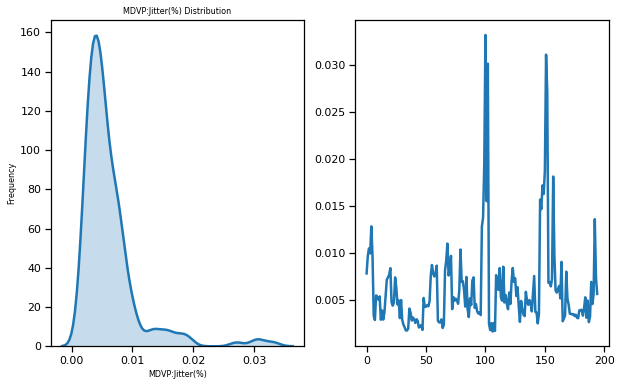

In [22]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:Jitter(%)'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:Jitter(%)", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:Jitter(%) Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:Jitter(%)'].values.tolist())

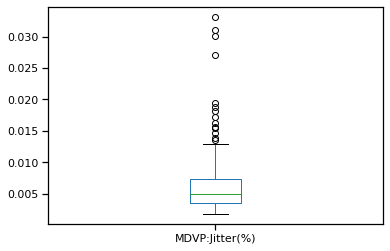

In [23]:
parkinsondf['MDVP:Jitter(%)'].plot(kind='box')

Observation :variation in fundamental frequency MDVP:Jitter(%) is normally distributed with huge outliers on it

In [144]:
quartiles = np.percentile(parkinsondf['MDVP:Jitter(Abs)'],[25,50,75])
jitterabs_max, jitterabs_min = parkinsondf['MDVP:Jitter(Abs)'].max(), parkinsondf['MDVP:Jitter(Abs)'].min()
print('interquartile(Q1) of variation in fundamental frequency MDVP:Jitter(Abs) is', quartiles[0])
print('Median of variation in fundamental frequency MDVP:Jitter(Abs) is:' ,quartiles[1])
print('interquartile(Q3) of variation in fundamental frequency MDVP:Jitter(Abs) is :' , quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of MDVP:Jitter(Abs):' , jitterper_max)
print('Minimum of MDVP:Jitter(Abs):' , jitterper_min)
print('skew of MDVP:Jitter(Abs) is',parkinsondf['MDVP:Jitter(Abs)'].skew())
print('kurtosis of MDVP:Jitter(Abs) is',parkinsondf['MDVP:Jitter(Abs)'].kurtosis())
print('mean of variation in fundamental frequency  MDVP:Jitter(Abs) is',parkinsondf['MDVP:Jitter(Abs)'].mean())
print('Std deviation of variation in fundamental frequency MDVP:Jitter(Abs) is',parkinsondf['MDVP:Jitter(Abs)'].std())
print('variance is',parkinsondf['MDVP:Jitter(Abs)'].var())

interquartile(Q1) of variation in fundamental frequency MDVP:Jitter(Abs) is 2e-05
Median of variation in fundamental frequency MDVP:Jitter(Abs) is: 2.9999999999999997e-05
interquartile(Q3) of variation in fundamental frequency MDVP:Jitter(Abs) is : 5.9999999999999995e-05
IQR is: 3.9999999999999996e-05
Maximum of MDVP:Jitter(Abs): 0.03316
Minimum of MDVP:Jitter(Abs): 0.00168
skew of MDVP:Jitter(Abs) is 2.6490714165257274
kurtosis of MDVP:Jitter(Abs) is 10.869042517763667
mean of variation in fundamental frequency  MDVP:Jitter(Abs) is 4.395897435897438e-05
Std deviation of variation in fundamental frequency MDVP:Jitter(Abs) is 3.482190859976327e-05
variance is 1.212565318530267e-09


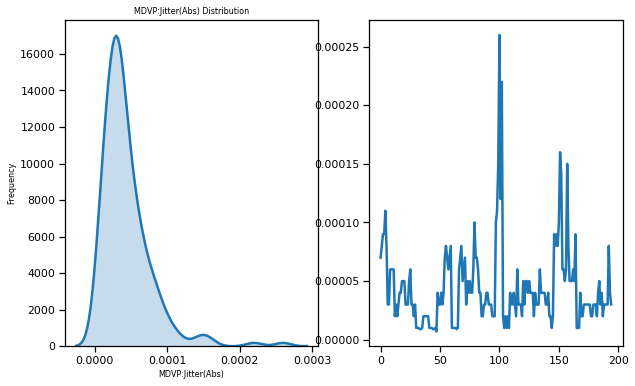

In [25]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:Jitter(Abs)'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:Jitter(Abs)", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:Jitter(Abs) Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:Jitter(Abs)'].values.tolist())

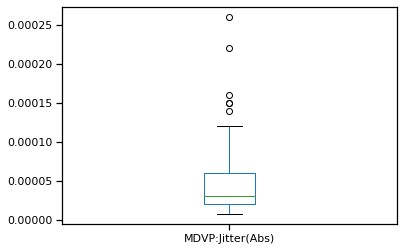

In [26]:
parkinsondf['MDVP:Jitter(Abs)'].plot(kind='box')

Observation :variation in fundamental frequency MDVP:Jitter(Abs) is normally distributed with right tail and outliers on it

In [143]:
quartiles = np.percentile(parkinsondf['MDVP:RAP'],[25,50,75])
RAP_max, RAP_min = parkinsondf['MDVP:RAP'].max(), parkinsondf['MDVP:RAP'].min()
print('interquartile(Q1) of variation in fundamental frequency MDVP:RAP is ', quartiles[0])
print('Median of variation in fundamental frequency MDVP:RAP is: ' ,quartiles[1])
print('interquartile(Q3) of variation in fundamental frequency MDVP:RAP is :' , quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of MDVP:RAP: is' , RAP_max)
print('Minimum of MDVP:RAP: is' , RAP_min)
print('skew of MDVP:RAP is',parkinsondf['MDVP:RAP'].skew())
print('kurtosis of MDVP:RAP is',parkinsondf['MDVP:RAP'].kurtosis())
print('mean of variation in fundamental frequency  MDVP:RAP  is',parkinsondf['MDVP:RAP'].mean())
print('Std deviation of variation in fundamental frequency MDVP:RAP  is',parkinsondf['MDVP:RAP'].std())
print('variance of average fundamental freuency  MDVP:RAP  is',parkinsondf['MDVP:RAP'].var())

interquartile(Q1) of variation in fundamental frequency MDVP:RAP is  0.0016600000000000002
Median of variation in fundamental frequency MDVP:RAP is:  0.0025
interquartile(Q3) of variation in fundamental frequency MDVP:RAP is : 0.003835
IQR is: 0.002175
Maximum of MDVP:RAP: is 0.02144
Minimum of MDVP:RAP: is 0.0006799999999999999
skew of MDVP:RAP is 3.360708450480554
kurtosis of MDVP:RAP is 14.213797721522418
mean of variation in fundamental frequency  MDVP:RAP  is 0.0033064102564102577
Std deviation of variation in fundamental frequency MDVP:RAP  is 0.0029677744162016897
variance of average fundamental freuency  MDVP:RAP  is 8.80768498546128e-06


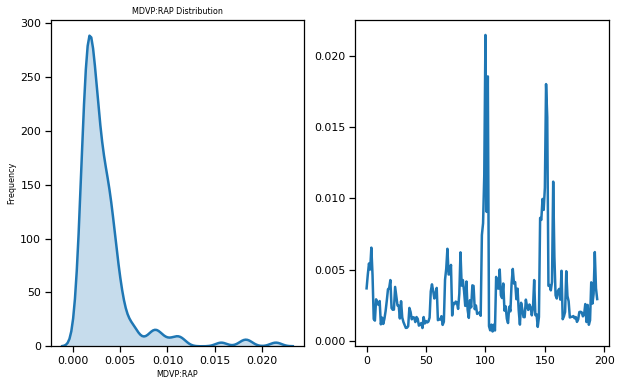

In [28]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:RAP'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:RAP", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:RAP Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:RAP'].values.tolist())

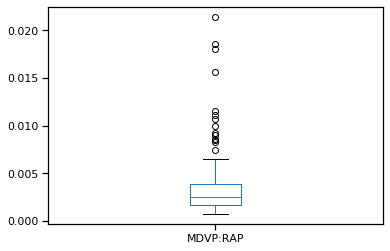

In [29]:
parkinsondf['MDVP:RAP'].plot(kind='box')

Observation : variation in fundamental frequency MDVP:RAP is normally distributed with huge outliers on is right

In [142]:
quartiles = np.percentile(parkinsondf['MDVP:RAP'],[25,50,75])
RAP_max, RAP_min = parkinsondf['MDVP:RAP'].max(), parkinsondf['MDVP:RAP'].min()
print('interquartile(Q1) of variation in fundamental frequency MDVP:RAP is ', quartiles[0])
print('Median of variation in fundamental frequency MDVP:RAP is: ' ,quartiles[1])
print('interquartile(Q3) of variation in fundamental frequency MDVP:RAP is :' , quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of MDVP:RAP: is' , RAP_max)
print('Minimum of MDVP:RAP: is' , RAP_min)
print('skew of MDVP:RAP is',parkinsondf['MDVP:RAP'].skew())
print('kurtosis of MDVP:RAP is',parkinsondf['MDVP:RAP'].kurtosis())
print('mean of variation in fundamental frequency  MDVP:RAP  is',parkinsondf['MDVP:RAP'].mean())
print('Std deviation of variation in fundamental frequency MDVP:RAP  is',parkinsondf['MDVP:RAP'].std())
print('variance of variation in fundamental frequency MDVP:RAP  is',parkinsondf['MDVP:RAP'].var())

interquartile(Q1) of variation in fundamental frequency MDVP:RAP is  0.0016600000000000002
Median of variation in fundamental frequency MDVP:RAP is:  0.0025
interquartile(Q3) of variation in fundamental frequency MDVP:RAP is : 0.003835
IQR is: 0.002175
Maximum of MDVP:RAP: is 0.02144
Minimum of MDVP:RAP: is 0.0006799999999999999
skew of MDVP:RAP is 3.360708450480554
kurtosis of MDVP:RAP is 14.213797721522418
mean of variation in fundamental frequency  MDVP:RAP  is 0.0033064102564102577
Std deviation of variation in fundamental frequency MDVP:RAP  is 0.0029677744162016897
variance of variation in fundamental frequency MDVP:RAP  is 8.80768498546128e-06


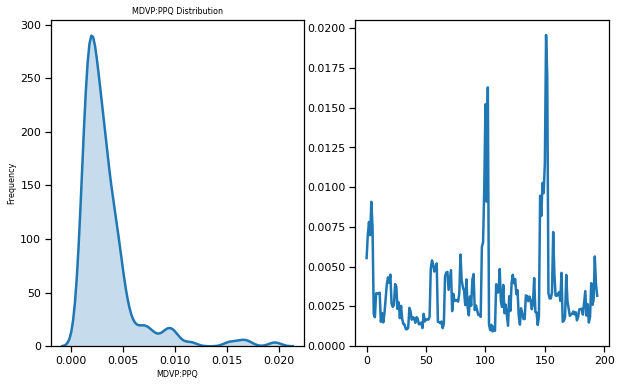

In [31]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:PPQ'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:PPQ", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:PPQ Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:PPQ'].values.tolist())

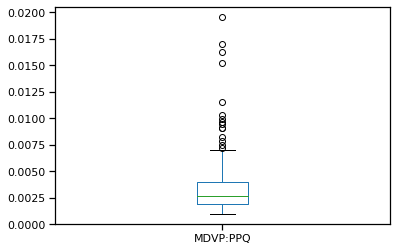

In [32]:
parkinsondf['MDVP:PPQ'].plot(kind='box')

Observation :Variation in fundamental frequency MDVP:PPQ is also normally distributed with huge outliers on it

In [140]:
quartiles = np.percentile(parkinsondf['Jitter:DDP'],[25,50,75])
jitterddp_max, jitterddp_min = parkinsondf['Jitter:DDP'].max(), parkinsondf['Jitter:DDP'].min()
print('interquartile(Q1) of variation in fundamental frequency Jitter:DDP is ', quartiles[0])
print('Median of variation in fundamental frequency Jitter:DDP is: ' ,quartiles[1])
print('interquartile(Q3) of variation in fundamental frequency Jitter:DDP is :' , quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of Jitter:DDP is' , jitterddp_max)
print('Minimum of Jitter:DDP is' , jitterddp_min)
print('skew of Jitter:DDP is',parkinsondf['Jitter:DDP'].skew())
print('kurtosis of Jitter:DDP is',parkinsondf['Jitter:DDP'].kurtosis())
print('mean of variation in fundamental frequency  Jitter:DDP  is',parkinsondf['Jitter:DDP'].mean())
print('Std deviation of variation in fundamental frequency Jitter:DDP is',parkinsondf['Jitter:DDP'].std())
print('variance of variation in fundamental frequency  Jitter:DDP  is',parkinsondf['Jitter:DDP'].var())

interquartile(Q1) of variation in fundamental frequency Jitter:DDP is  0.004985
Median of variation in fundamental frequency Jitter:DDP is:  0.007490000000000001
interquartile(Q3) of variation in fundamental frequency Jitter:DDP is : 0.011505
IQR is: 0.00652
Maximum of Jitter:DDP is 0.06433
Minimum of Jitter:DDP is 0.0020399999999999997
skew of Jitter:DDP is 3.3620584478857203
kurtosis of Jitter:DDP is 14.224761911379424
mean of variation in fundamental frequency  Jitter:DDP  is 0.009919948717948712
Std deviation of variation in fundamental frequency Jitter:DDP is 0.008903344355858987
variance of variation in fundamental frequency  Jitter:DDP  is 7.926954071900607e-05


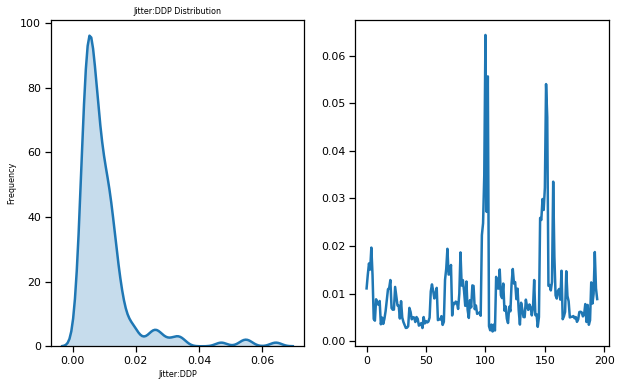

In [34]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['Jitter:DDP'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("Jitter:DDP", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("Jitter:DDP Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['Jitter:DDP'].values.tolist())

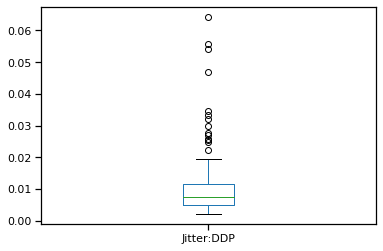

In [35]:
parkinsondf['Jitter:DDP'].plot(kind='box')

Observation :Variation in fundamental frequency Jitter:DDP is also normally distributed with huge outliers on it . All the measures of variation in fundamental frequency is normally distributed with huge outliers

Distribution of variation in amplitude

In [139]:
quartiles = np.percentile(parkinsondf['MDVP:Shimmer'],[25,50,75])
Shimmer_max, Shimmer_min = parkinsondf['MDVP:Shimmer'].max(), parkinsondf['MDVP:Shimmer'].min()
print('interquartile(Q1) of variation in amplitude of MDVP:Shimmer is %.3f' % quartiles[0])
print('Median of variation in amplitude of MDVP:Shimmer is: %.3f' % quartiles[1])
print('interquartile(Q3) of variation in amplitude of MDVP:Shimmer  is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of MDVP:Shimmer: %.3f' % Shimmer_max)
print('Minimum of MDVP:Shimmer: %.3f' % Shimmer_min)
print('skew of variation in amplitude of MDVP:Shimmer is',parkinsondf['MDVP:Shimmer'].skew())
print('kurtosis of variation in amplitude of MDVP:Shimmer is',parkinsondf['MDVP:Shimmer'].kurtosis())
print('Average of variation in amplitude of MDVP:Shimmer is',parkinsondf['MDVP:Shimmer'].mean())
print('Std deviation of variation in amplitude of MDVP:Shimmer is',parkinsondf['MDVP:Shimmer'].std())
print('variance of variation in amplitude of MDVP:Shimmer  is',parkinsondf['MDVP:Shimmer'].var())

interquartile(Q1) of variation in amplitude of MDVP:Shimmer is 0.017
Median of variation in amplitude of MDVP:Shimmer is: 0.023
interquartile(Q3) of variation in amplitude of MDVP:Shimmer  is : 0.038
IQR is: 0.021380000000000003
Maximum of MDVP:Shimmer: 0.119
Minimum of MDVP:Shimmer: 0.010
skew of variation in amplitude of MDVP:Shimmer is 1.6664804101559663
kurtosis of variation in amplitude of MDVP:Shimmer is 3.2383081111007535
Average of variation in amplitude of MDVP:Shimmer is 0.0297091282051282
Std deviation of variation in amplitude of MDVP:Shimmer is 0.018856931858946806
variance of variation in amplitude of MDVP:Shimmer  is 0.0003555838791329631


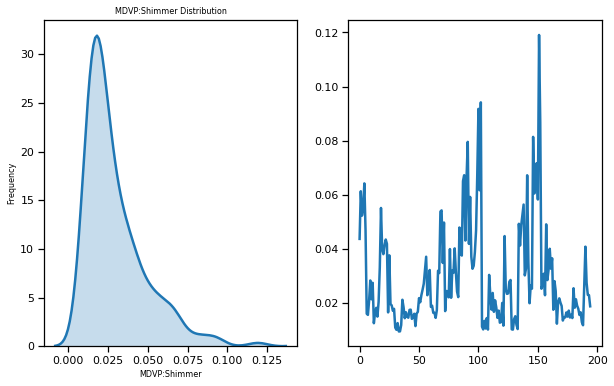

In [37]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:Shimmer'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:Shimmer", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:Shimmer Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:Shimmer'].values.tolist())

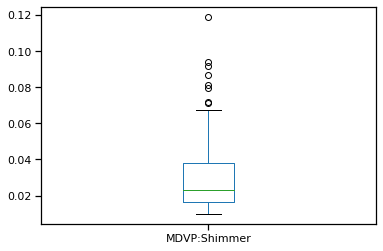

In [38]:
parkinsondf['MDVP:Shimmer'].plot(kind='box')

In [138]:
quartiles = np.percentile(parkinsondf['MDVP:Shimmer(dB)'],[25,50,75])
Shimmerdb_max, Shimmerdb_min = parkinsondf['MDVP:Shimmer(dB)'].max(), parkinsondf['MDVP:Shimmer(dB)'].min()
print('interquartile(Q1) of variation in amplitude ofMDVP:Shimmer(dB) is %.3f' % quartiles[0])
print('Median of variation in amplitude of MDVP:Shimmer(dB) is: %.3f' % quartiles[1])
print('interquartile(Q3) of variation in amplitude of MDVP:Shimmer(dB)  is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum ofMDVP:Shimmer(dB): %.3f' % Shimmerdb_max)
print('Minimum of MDVP:Shimmer(dB): %.3f' % Shimmerdb_min)
print('skew of variation in amplitude of MDVP:Shimmer(dB) is',parkinsondf['MDVP:Shimmer(dB)'].skew())
print('kurtosis of variation in amplitude of MDVP:Shimmer(dB) is',parkinsondf['MDVP:Shimmer(dB)'].kurtosis())
print('Average of variation in amplitude of MDVP:Shimmer(dB) is',parkinsondf['MDVP:Shimmer(dB)'].mean())
print('Std deviation of variation in amplitude of MDVP:Shimmer(dB) is',parkinsondf['MDVP:Shimmer(dB)'].std())
print('variance ofvariation in amplitude of MDVP:Shimmer(dB)  is',parkinsondf['MDVP:Shimmer(dB)'].var())

interquartile(Q1) of variation in amplitude ofMDVP:Shimmer(dB) is 0.148
Median of variation in amplitude of MDVP:Shimmer(dB) is: 0.221
interquartile(Q3) of variation in amplitude of MDVP:Shimmer(dB)  is : 0.350
IQR is: 0.20149999999999998
Maximum ofMDVP:Shimmer(dB): 1.302
Minimum of MDVP:Shimmer(dB): 0.085
skew of variation in amplitude of MDVP:Shimmer(dB) is 1.999388639086127
kurtosis of variation in amplitude of MDVP:Shimmer(dB) is 5.128192509867997
Average of variation in amplitude of MDVP:Shimmer(dB) is 0.2822512820512821
Std deviation of variation in amplitude of MDVP:Shimmer(dB) is 0.19487729006053411
variance ofvariation in amplitude of MDVP:Shimmer(dB)  is 0.037977158181337546


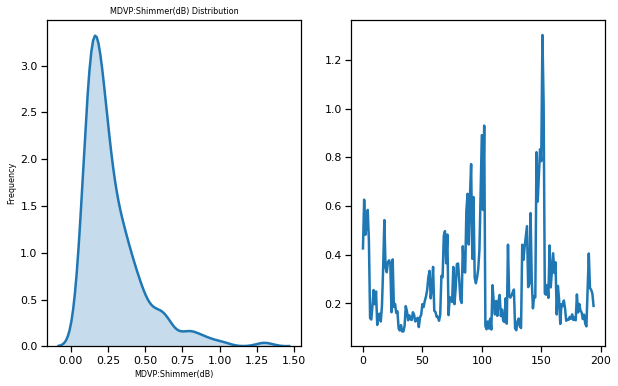

In [40]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.kdeplot(parkinsondf['MDVP:Shimmer(dB)'],ax = ax11, shade=True, legend=False)
ax11.set_xlabel("MDVP:Shimmer(dB)", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:Shimmer(dB) Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:Shimmer(dB)'].values.tolist())

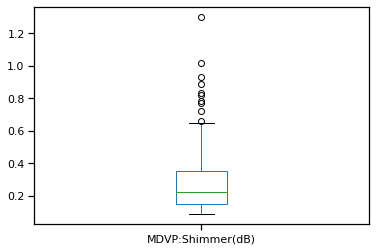

In [41]:
parkinsondf['MDVP:Shimmer(dB)'].plot(kind='box')

In [136]:
quartiles = np.percentile(parkinsondf['Shimmer:APQ3'],[25,50,75])
ShimmerAPQ3_max, ShimmerAPQ3_min = parkinsondf['Shimmer:APQ3'].max(), parkinsondf['MDVP:Shimmer(dB)'].min()
print('interquartile(Q1) of variation in amplitude of Shimmer:APQ3 is %.3f' % quartiles[0])
print('Median of variation in amplitude of Shimmer:APQ3 is: %.3f' % quartiles[1])
print('interquartile(Q3) of variation in amplitude of Shimmer:APQ3 is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of Shimmer:APQ3: %.3f' % ShimmerAPQ3_max)
print('Minimum of Shimmer:APQ3: %.3f' % ShimmerAPQ3_min)
print('skew of variation in amplitude ofShimmer:APQ3 is',parkinsondf['Shimmer:APQ3'].skew())
print('kurtosis of variation in amplitude of Shimmer:APQ3 is',parkinsondf['Shimmer:APQ3'].kurtosis())
print('Average of variation in amplitude of Shimmer:APQ3 is',parkinsondf['Shimmer:APQ3'].mean())
print('Std deviation of variation in amplitude of Shimmer:APQ3 is',parkinsondf['Shimmer:APQ3'].std())
print('variance of  variation in amplitude of Shimmer:APQ3  is',parkinsondf['Shimmer:APQ3'].var())

interquartile(Q1) of variation in amplitude of Shimmer:APQ3 is 0.008
Median of variation in amplitude of Shimmer:APQ3 is: 0.013
interquartile(Q3) of variation in amplitude of Shimmer:APQ3 is : 0.020
IQR is: 0.012019999999999998
Maximum of Shimmer:APQ3: 0.056
Minimum of Shimmer:APQ3: 0.085
skew of variation in amplitude ofShimmer:APQ3 is 1.5805763798815677
kurtosis of variation in amplitude of Shimmer:APQ3 is 2.7201516395960734
Average of variation in amplitude of Shimmer:APQ3 is 0.015664153846153845
Std deviation of variation in amplitude of Shimmer:APQ3 is 0.010153161595709016
variance of  variation in amplitude of Shimmer:APQ3  is 0.00010308669038858046


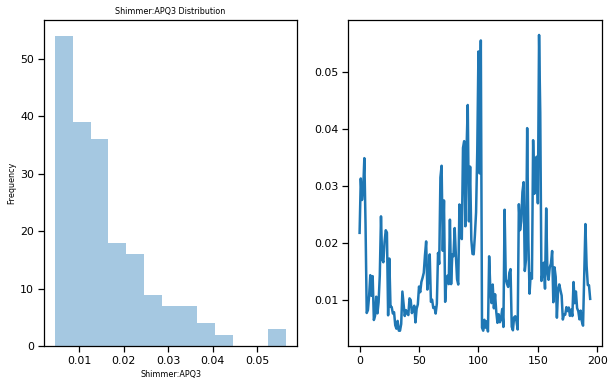

In [43]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['Shimmer:APQ3'],ax = ax11,kde=False)
ax11.set_xlabel("Shimmer:APQ3", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("Shimmer:APQ3 Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['Shimmer:APQ3'].values.tolist())

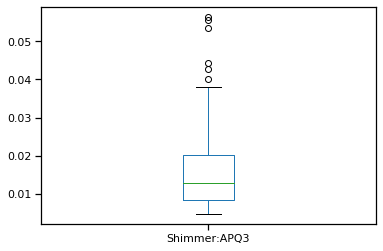

In [44]:
parkinsondf['Shimmer:APQ3'].plot(kind='box')

In [135]:
quartiles = np.percentile(parkinsondf['Shimmer:APQ5'],[25,50,75])
APQ5_max, APQ5_min = parkinsondf['Shimmer:APQ5'].max(), parkinsondf['Shimmer:APQ5'].min()
print('interquartile(Q1) of variation in amplitude (Shimmer:APQ5) is %.3f' % quartiles[0])
print('Median of of variation in amplitude  of(Shimmer:APQ5) is: %.3f' % quartiles[1])
print('interquartile(Q3) of of variation in amplitude of(Shimmer:APQ5) is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of Shimmer:APQ5: %.3f' % APQ5_max)
print('Minimum of Shimmer:APQ5: %.3f' % APQ5_min)
print('skew of Shimmer:APQ5 is',parkinsondf['Shimmer:APQ5'].skew())
print('kurtosis of Shimmer:APQ5 is',parkinsondf['Shimmer:APQ5'].kurtosis())
print('Average of variation in amplitude of(Shimmer:APQ5) is',parkinsondf['Shimmer:APQ5'].mean())
print('Std deviation of variation in amplitude of(Shimmer:APQ5)  is',parkinsondf['Shimmer:APQ5'].std())
print('variance of variation in amplitude of(Shimmer:APQ5)  is',parkinsondf['Shimmer:APQ5'].var())

interquartile(Q1) of variation in amplitude (Shimmer:APQ5) is 0.010
Median of of variation in amplitude  of(Shimmer:APQ5) is: 0.013
interquartile(Q3) of of variation in amplitude of(Shimmer:APQ5) is : 0.022
IQR is: 0.012799999999999999
Maximum of Shimmer:APQ5: 0.079
Minimum of Shimmer:APQ5: 0.006
skew of Shimmer:APQ5 is 1.798697066537622
kurtosis of Shimmer:APQ5 is 3.8742096517587257
Average of variation in amplitude of(Shimmer:APQ5) is 0.01787825641025642
Std deviation of variation in amplitude of(Shimmer:APQ5)  is 0.012023705538741733
variance of variation in amplitude of(Shimmer:APQ5)  is 0.0001445694948823686


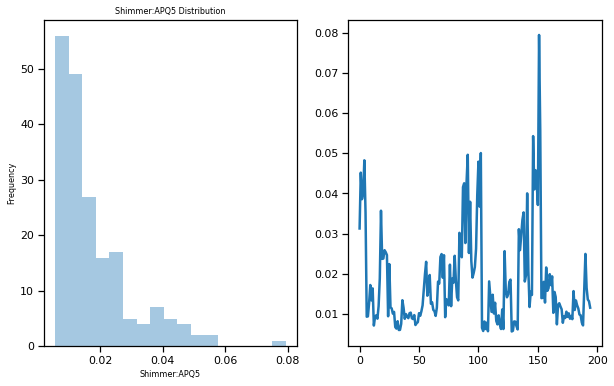

In [46]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['Shimmer:APQ5'],ax = ax11,kde=False)
ax11.set_xlabel("Shimmer:APQ5", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("Shimmer:APQ5 Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['Shimmer:APQ5'].values.tolist())

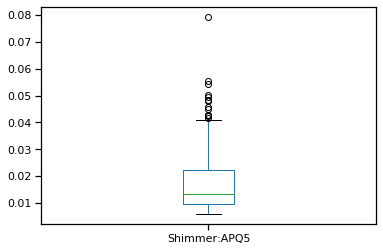

In [47]:
parkinsondf['Shimmer:APQ5'].plot(kind='box')

In [134]:
quartiles = np.percentile(parkinsondf['MDVP:APQ'],[25,50,75])
APQ_max, APQ_min = parkinsondf['MDVP:APQ'].max(), parkinsondf['PPE'].min()
print('interquartile(Q1) of variation in amplitude MDVP:APQ is %.3f' % quartiles[0])
print('Median of  variation in amplitude MDVP:APQ is: %.3f' % quartiles[1])
print('interquartile(Q3) of non linear measures of fundamental freuency variation MDVP:APQis : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of MDVP:APQ: %.3f' % APQ_max)
print('Minimum of MDVP:APQ: %.3f' % APQ_min)
print('skew of MDVP:APQ is',parkinsondf['MDVP:APQ'].skew())
print('kurtosis of MDVP:APQ is',parkinsondf['MDVP:APQ'].kurtosis())
print('Average of non linear measures of fundamental freuency of variation MDVP:APQ is',parkinsondf['MDVP:APQ'].mean())
print('Std deviation of non linear measures of fundamental freuency variation MDVP:APQ  is',parkinsondf['MDVP:APQ'].std())
print('variance ofnon linear measures of fundamental freuency variation MDVP:APQ is',parkinsondf['MDVP:APQ'].var())

interquartile(Q1) of variation in amplitude MDVP:APQ is 0.013
Median of  variation in amplitude MDVP:APQ is: 0.018
interquartile(Q3) of non linear measures of fundamental freuency variation MDVP:APQis : 0.029
IQR is: 0.01632
Maximum of MDVP:APQ: 0.138
Minimum of MDVP:APQ: 0.045
skew of MDVP:APQ is 2.618046502215422
kurtosis of MDVP:APQ is 11.163288378025502
Average of non linear measures of fundamental freuency of variation MDVP:APQ is 0.02408148717948718
Std deviation of non linear measures of fundamental freuency variation MDVP:APQ  is 0.01694673624702943
variance ofnon linear measures of fundamental freuency variation MDVP:APQ is 0.0002871918694263811


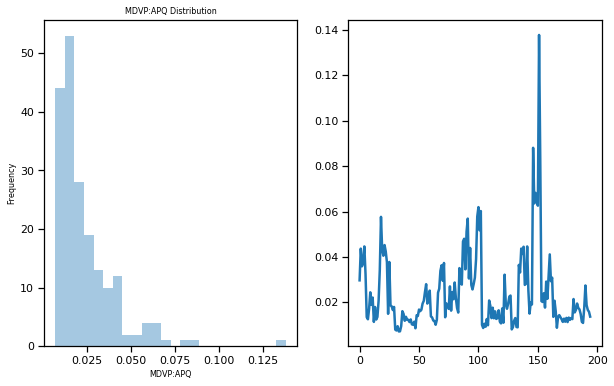

In [49]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['MDVP:APQ'],ax = ax11,kde=False)
ax11.set_xlabel("MDVP:APQ", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("MDVP:APQ Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['MDVP:APQ'].values.tolist())

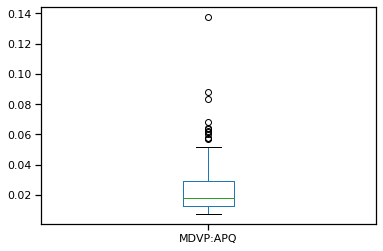

In [50]:
parkinsondf['MDVP:APQ'].plot(kind='box')

In [133]:
quartiles = np.percentile(parkinsondf['Shimmer:DDA'],[25,50,75])
DDA_max, DDA_min = parkinsondf['Shimmer:DDA'].max(), parkinsondf['Shimmer:DDA'].min()
print('interquartile(Q1) of variation in amplitude (Shimmer:DDA) is %.3f' % quartiles[0])
print('Median of of variation in amplitude  of(Shimmer:DDA) is: %.3f' % quartiles[1])
print('interquartile(Q3) of of variation in amplitude of(Shimmer:DDA) is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of Shimmer:DDA: %.3f' % DDA_max)
print('Minimum of Shimmer:DDA: %.3f' % DDA_min)
print('skew of Shimmer:DDA is',parkinsondf['Shimmer:DDA'].skew())
print('kurtosis of Shimmer:DDA is',parkinsondf['Shimmer:DDA'].kurtosis())
print('Average of variation in amplitude of(Shimmer:DDA) is',parkinsondf['Shimmer:DDA'].mean())
print('Std deviation of variation in amplitude of(Shimmer:DDA)  is',parkinsondf['Shimmer:DDA'].std())
print('variance of variation in amplitude of(Shimmer:DDA)  is',parkinsondf['Shimmer:DDA'].var())

interquartile(Q1) of variation in amplitude (Shimmer:DDA) is 0.025
Median of of variation in amplitude  of(Shimmer:DDA) is: 0.038
interquartile(Q3) of of variation in amplitude of(Shimmer:DDA) is : 0.061
IQR is: 0.03606
Maximum of Shimmer:DDA: 0.169
Minimum of Shimmer:DDA: 0.014
skew of Shimmer:DDA is 1.5806179936782263
kurtosis of Shimmer:DDA is 2.720661344498221
Average of variation in amplitude of(Shimmer:DDA) is 0.04699261538461537
Std deviation of variation in amplitude of(Shimmer:DDA)  is 0.03045911943124041
variance of variation in amplitude of(Shimmer:DDA)  is 0.0009277579565265671


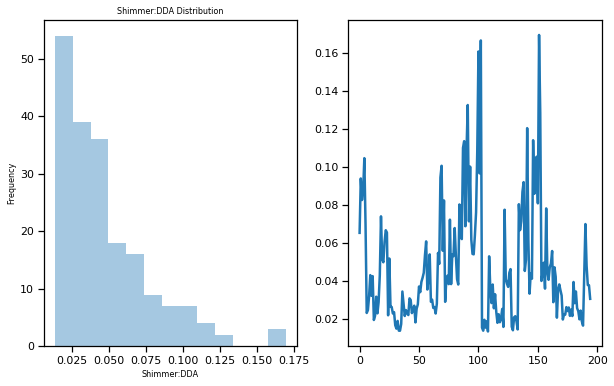

In [52]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['Shimmer:DDA'],ax = ax11,kde=False)
ax11.set_xlabel("Shimmer:DDA", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("Shimmer:DDA Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['Shimmer:DDA'].values.tolist())

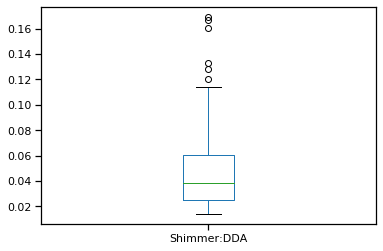

In [53]:
parkinsondf['Shimmer:DDA'].plot(kind='box')

Observation : Several measures of variation in amplitude is also normally distributed with outliers.

 Distribution of ratio of noise to tonal components in the voice

In [132]:
quartiles = np.percentile(parkinsondf['NHR'],[25,50,75])
NHR_max, NHR_min = parkinsondf['NHR'].max(), parkinsondf['NHR'].min()
print('interquartile(Q1) of noise to tonal components in the voice NHR is %.3f' % quartiles[0])
print('Median of noise to tonal components in the voice NHR is: %.3f' % quartiles[1])
print('interquartile(Q3) of noise to tonal components in the voice NHR is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of NHR: %.3f' % NHR_max)
print('Minimum of NHR: %.3f' % NHR_min)
print('skew of NHR is',parkinsondf['NHR'].skew())
print('kurtosis of NHR is',parkinsondf['NHR'].kurtosis())
print('Average of noise to tonal components in the voice  NHR is',parkinsondf['NHR'].mean())
print('Std deviation of noise to tonal components in the voice NHR  is',parkinsondf['NHR'].std())
print('variance of noise to tonal components in the voice NHR  is',parkinsondf['NHR'].var())

interquartile(Q1) of noise to tonal components in the voice NHR is 0.006
Median of noise to tonal components in the voice NHR is: 0.012
interquartile(Q3) of noise to tonal components in the voice NHR is : 0.026
IQR is: 0.019715
Maximum of NHR: 0.315
Minimum of NHR: 0.001
skew of NHR is 4.22070912913906
kurtosis of NHR is 21.994974114984924
Average of noise to tonal components in the voice  NHR is 0.024847076923076923
Std deviation of noise to tonal components in the voice NHR  is 0.04041844855606929
variance of noise to tonal components in the voice NHR  is 0.0016336509836796195


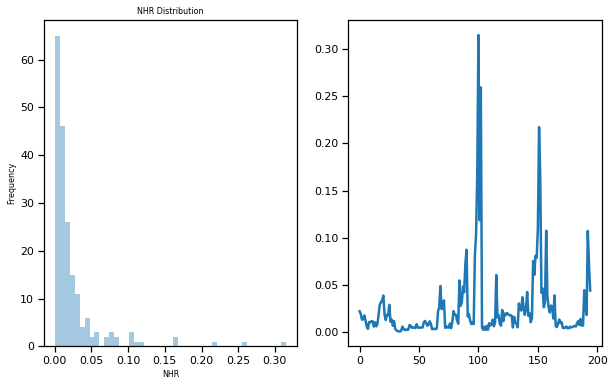

In [55]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['NHR'],ax = ax11,kde=False)
ax11.set_xlabel("NHR", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("NHR Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['NHR'].values.tolist())

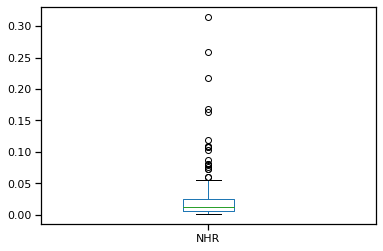

In [56]:
parkinsondf['NHR'].plot(kind='box')

In [131]:
quartiles = np.percentile(parkinsondf['HNR'],[25,50,75])
HNR_max, HNR_min = parkinsondf['HNR'].max(), parkinsondf['HNR'].min()
print('interquartile(Q1) of noise to tonal components in the voice HNR is %.3f' % quartiles[0])
print('Median of noise to tonal components in the voice NHR is: %.3f' % quartiles[1])
print('interquartile(Q3) of noise to tonal components in the voice HNR is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of HNR: %.3f' % HNR_max)
print('Minimum of HNR: %.3f' % HNR_min)
print('skew of HNR is',parkinsondf['NHR'].skew())
print('kurtosis of HNR is',parkinsondf['NHR'].kurtosis())
print('Average of noise to tonal components in the voice HNR is',parkinsondf['HNR'].mean())
print('Std deviation of noise to tonal components in the voice HNR is',parkinsondf['HNR'].std())
print('variance of noise to tonal components in the voice HNR  is',parkinsondf['HNR'].var())

interquartile(Q1) of noise to tonal components in the voice HNR is 19.198
Median of noise to tonal components in the voice NHR is: 22.085
interquartile(Q3) of noise to tonal components in the voice HNR is : 25.075
IQR is: 5.877499999999998
Maximum of HNR: 33.047
Minimum of HNR: 8.441
skew of HNR is 4.22070912913906
kurtosis of HNR is 21.994974114984924
Average of noise to tonal components in the voice HNR is 21.885974358974366
Std deviation of noise to tonal components in the voice HNR is 4.425764269063427
variance of noise to tonal components in the voice HNR  is 19.58738936531853


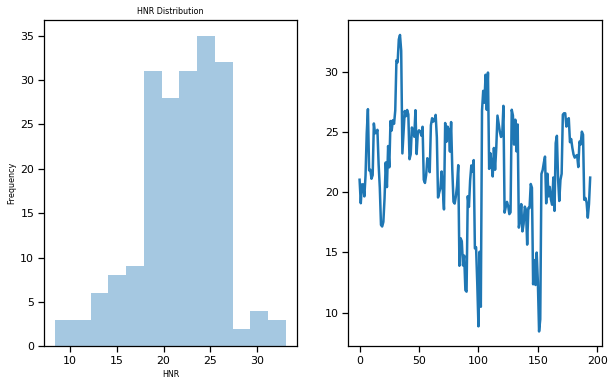

In [58]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['HNR'],ax = ax11,kde=False)
ax11.set_xlabel("HNR", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("HNR Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['HNR'].values.tolist())

Distribution of nonlinear dynamical complexity measures

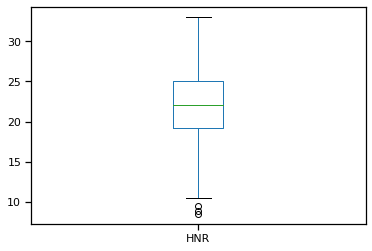

In [59]:
parkinsondf['HNR'].plot(kind='box')

Observation : Two measures of ratio of noise to tonal components in the voice HNR and NHR has outliers.   HNR has outliers on left and NHR has outliers on its right

Distribution of Non-linear measures of fundamental frequency variation

In [130]:
quartiles = np.percentile(parkinsondf['RPDE'],[25,50,75])
RPDE_max, RPDE_min = parkinsondf['RPDE'].max(), parkinsondf['RPDE'].min()
print('interquartile(Q1) of nonlinear dynamical complexity measures RPDE is %.3f' % quartiles[0])
print('Median of nonlinear dynamical complexity measures RDPE is: %.3f' % quartiles[1])
print('interquartile(Q3) of nonlinear dynamical complexity measures RDPE is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of RPDE: %.3f' % RPDE_max)
print('Minimum of RPDE: %.3f' % RPDE_min)
print('skew of RPDE is',parkinsondf['RPDE'].skew())
print('kurtosis of RPDE is',parkinsondf['RPDE'].kurtosis())
print('Average of nonlinear dynamical complexity measures RDPE is',parkinsondf['RPDE'].mean())
print('Std deviation of nonlinear dynamical complexity measures RDPE is',parkinsondf['RPDE'].std())
print('variance of nonlinear dynamical complexity measures RDPE is',parkinsondf['RPDE'].var())

interquartile(Q1) of nonlinear dynamical complexity measures RPDE is 0.421
Median of nonlinear dynamical complexity measures RDPE is: 0.496
interquartile(Q3) of nonlinear dynamical complexity measures RDPE is : 0.588
IQR is: 0.16625649999999997
Maximum of RPDE: 0.685
Minimum of RPDE: 0.257
skew of RPDE is -0.14340241379821705
kurtosis of RPDE is -0.9217809777573227
Average of nonlinear dynamical complexity measures RDPE is 0.4985355384615386
Std deviation of nonlinear dynamical complexity measures RDPE is 0.10394171413073466
variance of nonlinear dynamical complexity measures RDPE is 0.010803879936435367


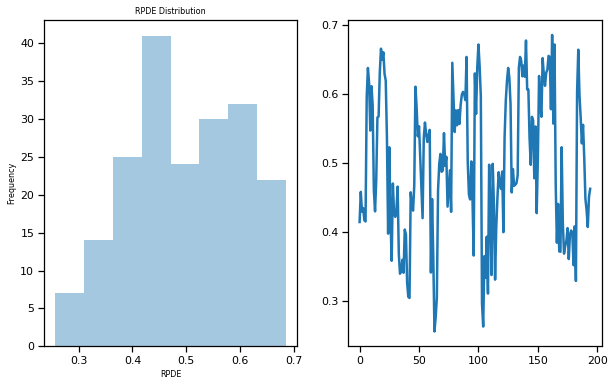

In [61]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['RPDE'],ax = ax11,kde=False)
ax11.set_xlabel("RPDE", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("RPDE Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['RPDE'].values.tolist())

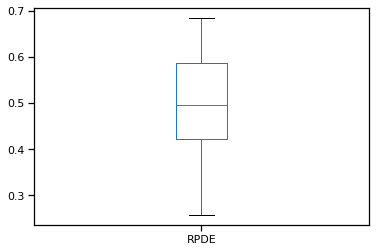

In [62]:
parkinsondf['RPDE'].plot(kind='box')

Observation : Nonlinear dynamical complexity measure RPDE is normally distributed which is skewed towards left

In [129]:
quartiles = np.percentile(parkinsondf['D2'],[25,50,75])
D2_max, D2_min = parkinsondf['D2'].max(), parkinsondf['D2'].min()
print('interquartile(Q1) of nonlinear dynamical complexity measures D2 is %.3f' % quartiles[0])
print('Median of nonlinear dynamical complexity measures D2 is: %.3f' % quartiles[1])
print('interquartile(Q3) of nonlinear dynamical complexity measures D2 is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of D2: %.3f' % D2_max)
print('Minimum of D2: %.3f' % D2_min)
print('skew of D2 is',parkinsondf['D2'].skew())
print('kurtosis of D2 is',parkinsondf['D2'].kurtosis())
print('Average of nonlinear dynamical complexity measures D2 is',parkinsondf['D2'].mean())
print('Std deviation of nonlinear dynamical complexity measures D2 is',parkinsondf['D2'].std())
print('variance of nonlinear dynamical complexity measures D2 is',parkinsondf['D2'].var())

interquartile(Q1) of nonlinear dynamical complexity measures D2 is 2.099
Median of nonlinear dynamical complexity measures D2 is: 2.362
interquartile(Q3) of nonlinear dynamical complexity measures D2 is : 2.636
IQR is: 0.5373304999999999
Maximum of D2: 3.671
Minimum of D2: 1.423
skew of D2 is 0.4303838913329283
kurtosis of D2 is 0.22033410480833515
Average of nonlinear dynamical complexity measures D2 is 2.3818260871794874
Std deviation of nonlinear dynamical complexity measures D2 is 0.38279904654611663
variance of nonlinear dynamical complexity measures D2 is 0.14653511003661598


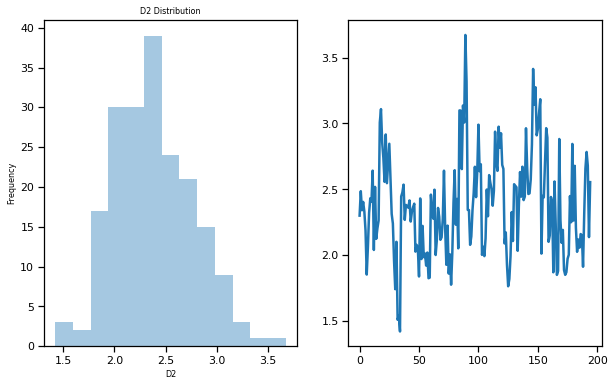

In [64]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['D2'],ax = ax11,kde=False)
ax11.set_xlabel("D2", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("D2 Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['D2'].values.tolist())

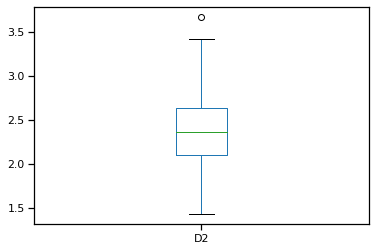

In [65]:
parkinsondf['D2'].plot(kind='box')

Observation :Nonlinear dynamical complexity measures is normally distributed with an outlier

Distribution Signal fractal scaling exponent

In [128]:
quartiles = np.percentile(parkinsondf['DFA'],[25,50,75])
DFA_max, DFA_min = parkinsondf['DFA'].max(), parkinsondf['DFA'].min()
print('interquartile(Q1) of Signal fractal DFA  is %.3f' % quartiles[0])
print('Median of Signal fractal DFA  is: %.3f' % quartiles[1])
print('interquartile(Q3) of Signal fractal DFA  is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of Signal fractal DFA: %.3f' % DFA_max)
print('Minimum of Signal fractal DFA: %.3f' % DFA_min)
print('skew of Signal fractal DFA is',parkinsondf['DFA'].skew())
print('kurtosis of Signal fractal DFA is',parkinsondf['DFA'].kurtosis())
print('Average of Signal fractal DFA is',parkinsondf['DFA'].mean())
print('Std deviation of Signal fractal DFA is',parkinsondf['DFA'].std())
print('variance of Signal fractal DFA is',parkinsondf['DFA'].var())

interquartile(Q1) of Signal fractal DFA  is 0.675
Median of Signal fractal DFA  is: 0.722
interquartile(Q3) of Signal fractal DFA  is : 0.762
IQR is: 0.08712399999999998
Maximum of Signal fractal DFA: 0.825
Minimum of Signal fractal DFA: 0.574
skew of Signal fractal DFA is -0.03321366071383484
kurtosis of Signal fractal DFA is -0.6861518492559342
Average of Signal fractal DFA is 0.7180990461538465
Std deviation of Signal fractal DFA is 0.0553358303465968
variance of Signal fractal DFA is 0.0030620541201473437


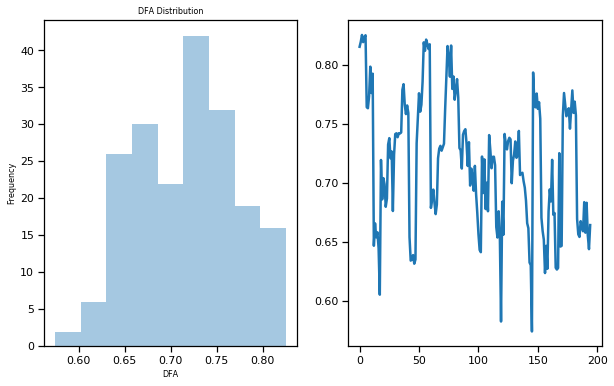

In [67]:
fig, ((ax11,ax12)) = plt.subplots(1,2)
fig.set_size_inches(10,6)
sns.distplot(parkinsondf['DFA'],ax = ax11,kde=False)
ax11.set_xlabel("DFA", fontsize=8)
ax11.set_ylabel("Frequency", fontsize=8)
ax11.set_title("DFA Distribution", fontsize=8)

ax12= plt.plot(parkinsondf['DFA'].values.tolist())

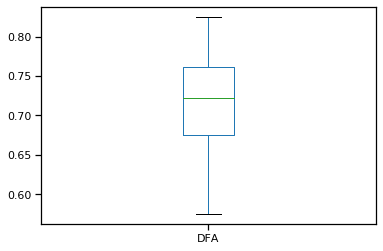

In [68]:
parkinsondf['DFA'].plot(kind='box')

Observation : Signal fractal scaling exponent is normally distributed and is skewed towards its left

Distribution of Non-linear measures of fundamental frequency variation

In [127]:
quartiles = np.percentile(parkinsondf['PPE'],[25,50,75])
PPE_max, PPE_min = parkinsondf['PPE'].max(), parkinsondf['PPE'].min()
print('interquartile(Q1) of non linear measures of fundamental freuency variation(PPE) is %.3f' % quartiles[0])
print('Median of non linear measures of fundamental freuency variation(PPE) is: %.3f' % quartiles[1])
print('interquartile(Q3) of non linear measures of fundamental freuency variation(PPE) is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of PPE: %.3f' % PPE_max)
print('Minimum of PPE: %.3f' % PPE_min)
print('skew of PPE is',parkinsondf['PPE'].skew())
print('kurtosis of PPE is',parkinsondf['PPE'].kurtosis())
print('Average of non linear measures of fundamental freuency of variation(PPE) is',parkinsondf['PPE'].mean())
print('Std deviation of non linear measures of fundamental freuency variation(PPE)  is',parkinsondf['PPE'].std())
print('variance of non linear measures of fundamental freuency variation(PPE) is',parkinsondf['PPE'].var())

interquartile(Q1) of non linear measures of fundamental freuency variation(PPE) is 0.137
Median of non linear measures of fundamental freuency variation(PPE) is: 0.194
interquartile(Q3) of non linear measures of fundamental freuency variation(PPE) is : 0.253
IQR is: 0.11552899999999999
Maximum of PPE: 0.527
Minimum of PPE: 0.045
skew of PPE is 0.7974910716463578
kurtosis of PPE is 0.5283349472852588
Average of non linear measures of fundamental freuency of variation(PPE) is 0.20655164102564108
Std deviation of non linear measures of fundamental freuency variation(PPE)  is 0.0901193224822751
variance of non linear measures of fundamental freuency variation(PPE) is 0.008121492284664293


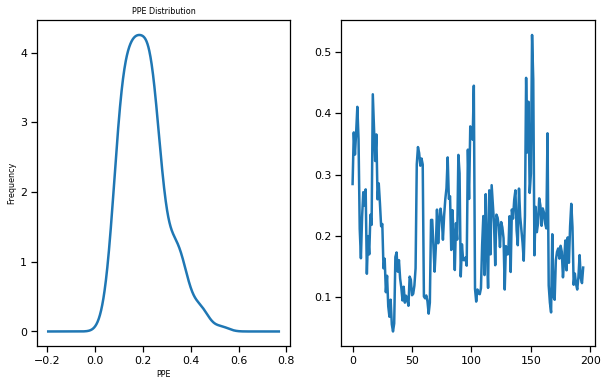

In [70]:
fig, ((ax21,ax22)) = plt.subplots(1,2)
fig.set_size_inches(10,6)

parkinsondf['PPE'].plot(kind='kde' , ax = ax21 )
ax21.set_xlabel("PPE", fontsize=8)
ax21.set_ylabel("Frequency", fontsize=8)
ax21.set_title("PPE Distribution", fontsize=8)

ax22 = plt.plot(parkinsondf['PPE'].values.tolist())



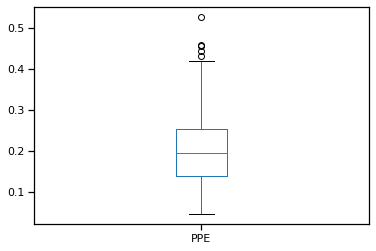

In [71]:
parkinsondf['PPE'].plot(kind='box')

Observation : From the above curve and the distibution of PPE we could see that this feature is normally distributed with skewness towards right and has outliers. mean is greater than median

In [126]:
quartiles = np.percentile(parkinsondf['spread1'],[25,50,75])
spread_max, spread_min = parkinsondf['spread1'].max(), parkinsondf['spread1'].min()
print('interquartile(Q1) of non linear measures of fundamental freuency variation(spread1) is %.3f' % quartiles[0])
print('Median of non linear measures of fundamental freuency variation(spread1) is: %.3f' % quartiles[1])
print('interquartile(Q3) of non linear measures of fundamental freuency variation(spread1) is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of spread1: %.3f' % spread_max)
print('Minimum of spread1: %.3f' % spread_min)
print('skew of spread1 is',parkinsondf['spread1'].skew())
print('kurtosis of spread1 is',parkinsondf['spread1'].kurtosis())
print('Average of non linear measures of fundamental freuency of variation(spread1) is',parkinsondf['spread1'].mean())
print('Std deviation of non linear measures of fundamental freuency variation(spread1)  is',parkinsondf['spread1'].std())
print('variance of non linear measures of fundamental freuency variation(spread1)   is',parkinsondf['spread1'].var())

interquartile(Q1) of non linear measures of fundamental freuency variation(spread1) is -6.450
Median of non linear measures of fundamental freuency variation(spread1) is: -5.721
interquartile(Q3) of non linear measures of fundamental freuency variation(spread1) is : -5.046
IQR is: 1.4039040000000007
Maximum of spread1: -2.434
Minimum of spread1: -7.965
skew of spread1 is 0.4321389320131796
kurtosis of spread1 is -0.05019918161280801
Average of non linear measures of fundamental freuency of variation(spread1) is -5.684396743589743
Std deviation of non linear measures of fundamental freuency variation(spread1)  is 1.090207763740309
variance of non linear measures of fundamental freuency variation(spread1)   is 1.1885529681196452


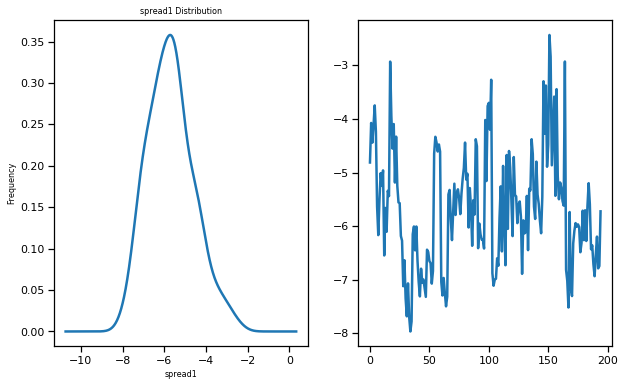

In [73]:
fig, ((ax21,ax22)) = plt.subplots(1,2)
fig.set_size_inches(10,6)

parkinsondf['spread1'].plot(kind='kde' , ax = ax21 )
ax21.set_xlabel("spread1", fontsize=8)
ax21.set_ylabel("Frequency", fontsize=8)
ax21.set_title("spread1 Distribution", fontsize=8)

ax22 = plt.plot(parkinsondf['spread1'].values.tolist())


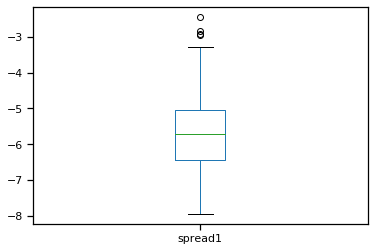

In [74]:
parkinsondf['spread1'].plot(kind='box')

Observation : From the above curve and the distibution of spread1 we could see that this feature is normally distributed with very little skewness towards right and has some outliers

In [125]:
quartiles = np.percentile(parkinsondf['spread2'],[25,50,75])
spread_max, spread_min = parkinsondf['spread2'].max(), parkinsondf['spread2'].min()
print('interquartile(Q1) of non linear measures of fundamental freuency variation(spread2) is %.3f' % quartiles[0])
print('Median of non linear measures of fundamental freuency variation(spread2) is: %.3f' % quartiles[1])
print('interquartile(Q3) of non linear measures of fundamental freuency variation(spread2) is : %.3f' % quartiles[2])
print('IQR is:',quartiles[2]- quartiles[0])
print('Maximum of spread1: %.3f' % spread_max)
print('Minimum of spread1: %.3f' % spread_min)
print('skew of spread2 is',parkinsondf['spread2'].skew())
print('kurtosis of spread2 is',parkinsondf['spread2'].kurtosis())
print('Average of non linear measures of fundamental freuency of variation(spread2) is',parkinsondf['spread2'].mean())
print('Std deviation of non linear measures of fundamental freuency variation(spread2)  is',parkinsondf['spread2'].std())
print('variance of non linear measures of fundamental freuency variation(spread2) is',parkinsondf['spread2'].var())

interquartile(Q1) of non linear measures of fundamental freuency variation(spread2) is 0.174
Median of non linear measures of fundamental freuency variation(spread2) is: 0.219
interquartile(Q3) of non linear measures of fundamental freuency variation(spread2) is : 0.279
IQR is: 0.10488349999999996
Maximum of spread1: 0.450
Minimum of spread1: 0.006
skew of spread2 is 0.14443048549278412
kurtosis of spread2 is -0.08302289327680024
Average of non linear measures of fundamental freuency of variation(spread2) is 0.2265103487179486
Std deviation of non linear measures of fundamental freuency variation(spread2)  is 0.08340576262039776
variance of non linear measures of fundamental freuency variation(spread2) is 0.00695652123829014


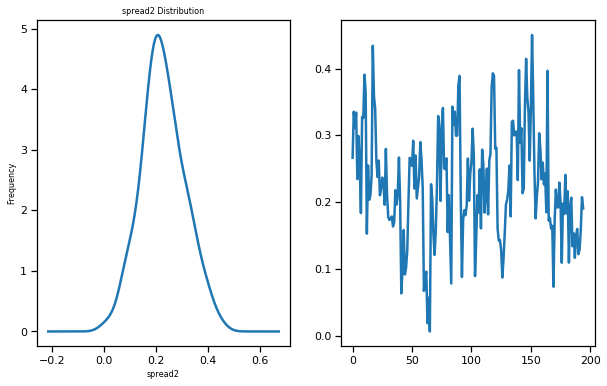

In [76]:
fig, ((ax21,ax22)) = plt.subplots(1,2)
fig.set_size_inches(10,6)

parkinsondf['spread2'].plot(kind='kde' , ax = ax21 )
ax21.set_xlabel("spread2", fontsize=8)
ax21.set_ylabel("Frequency", fontsize=8)
ax21.set_title("spread2 Distribution", fontsize=8)

ax22 = plt.plot(parkinsondf['spread2'].values.tolist())


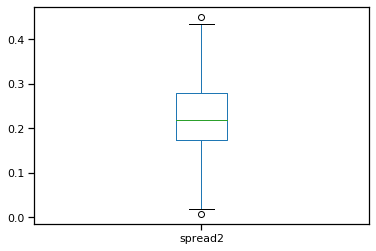

In [77]:
parkinsondf['spread2'].plot(kind='box')

Observation : From the above curve and the distibution of spread1 we could see that this feature is normally distributed with an outlier

Distribution of status

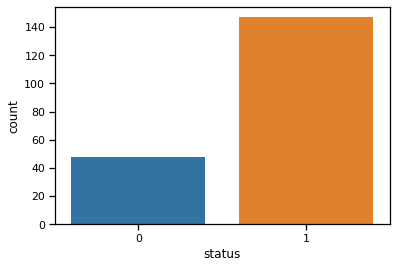

In [78]:
sns.countplot(parkinsondf['status'])

We could observe the patients with PD are more than that of patients without PD

In [79]:
parkinsondf['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [80]:
train_char_label = 'MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'

### Bivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002685B7A9358>,
      dtype=object)

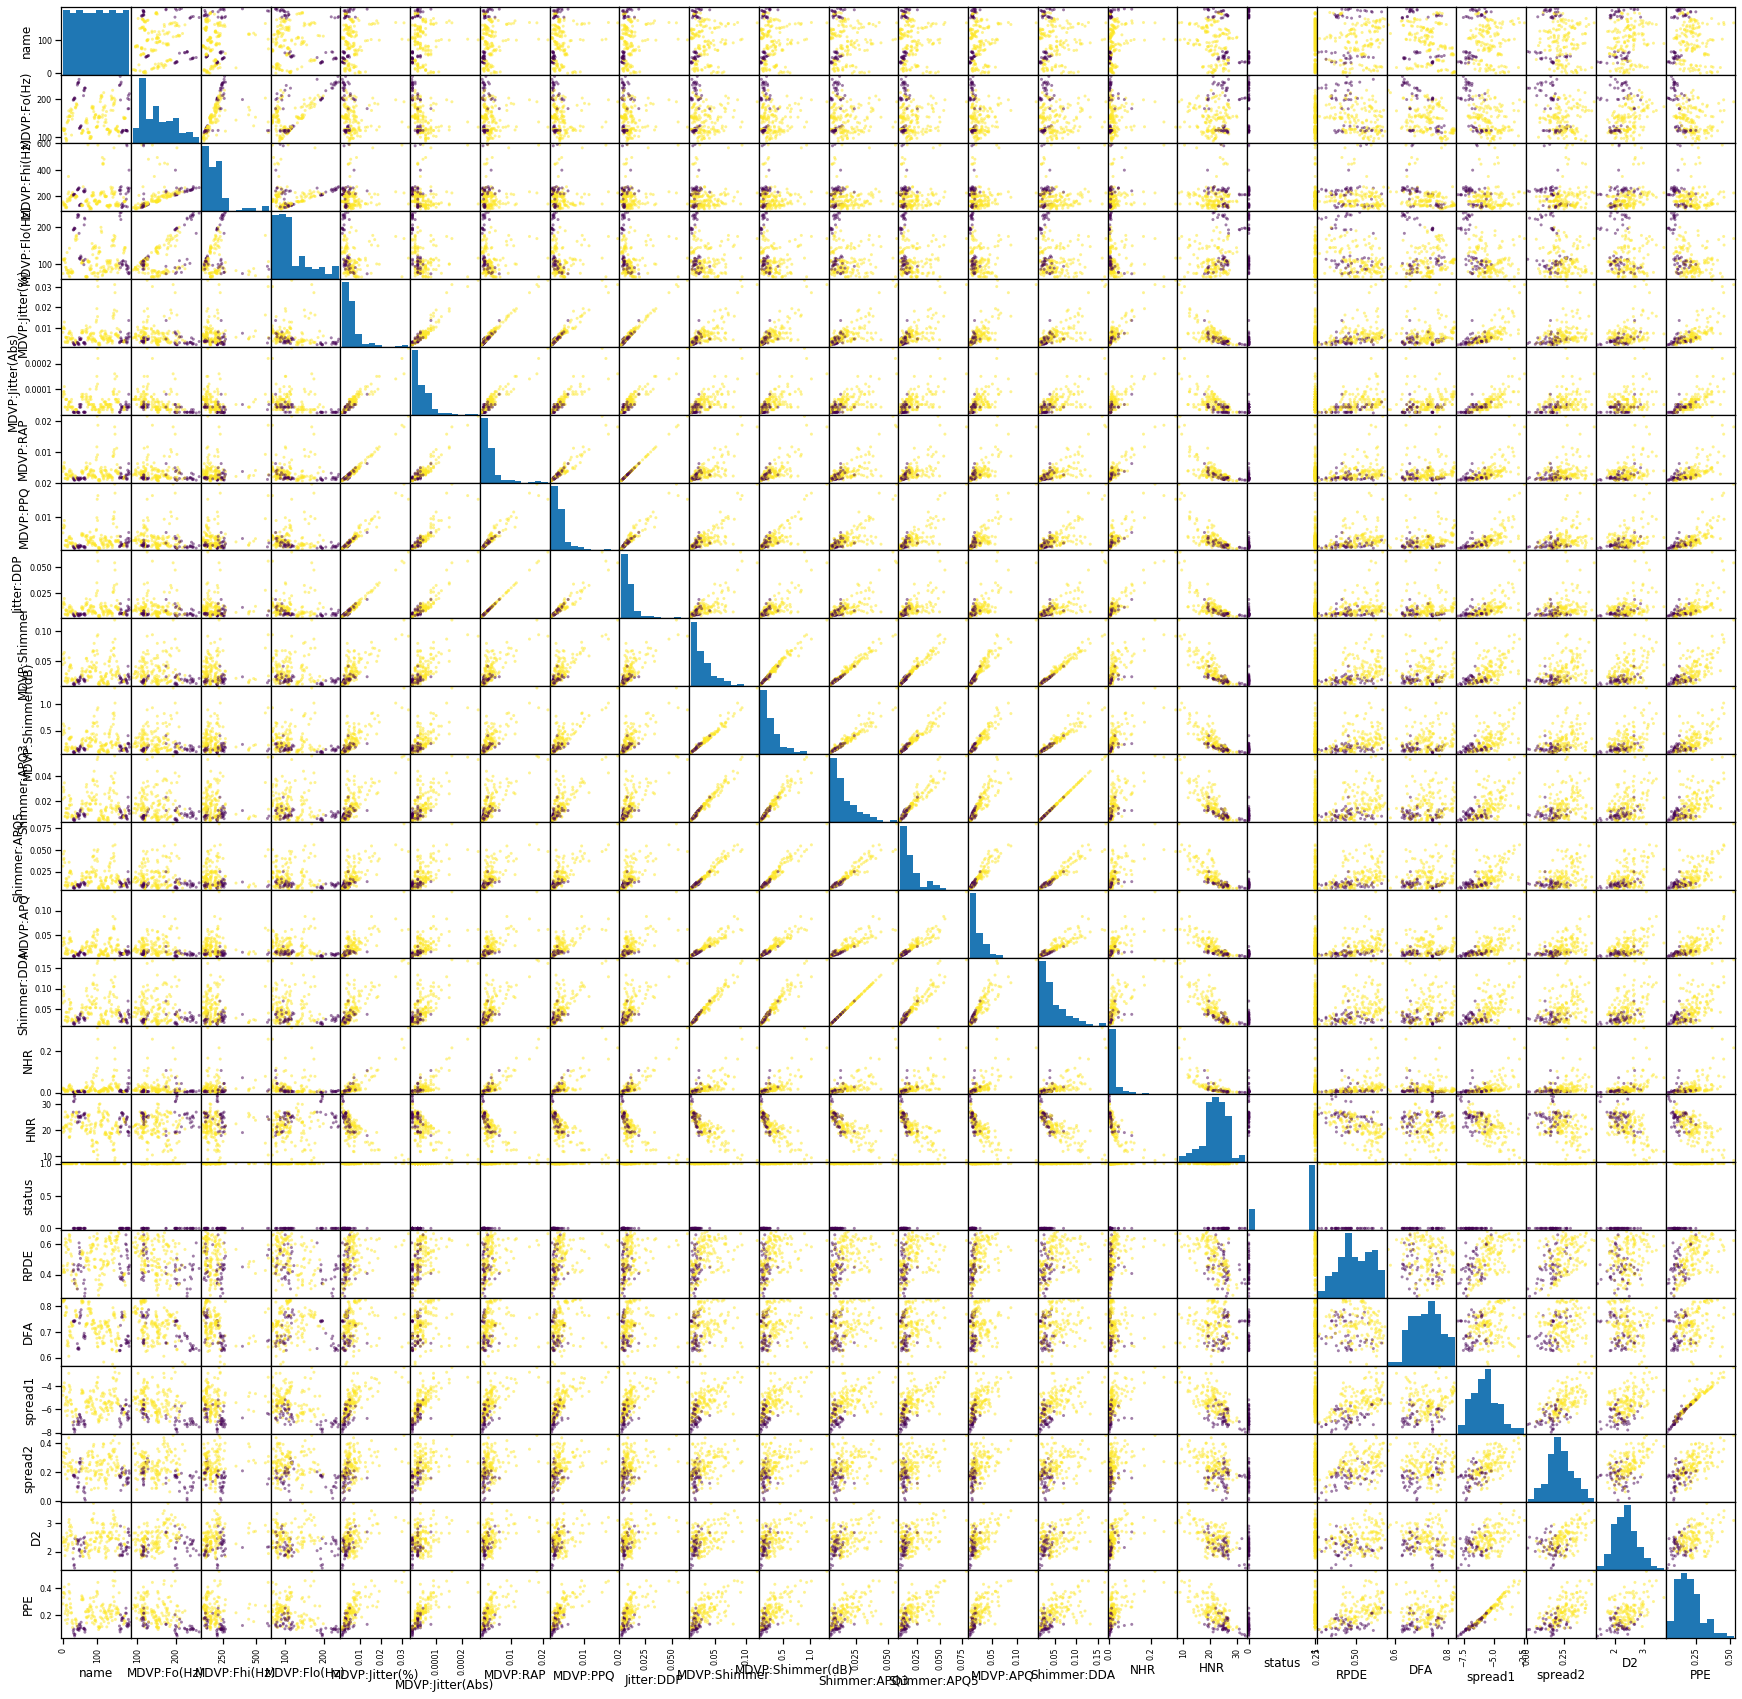

In [80]:
pd.plotting.scatter_matrix(parkinsondf, c=parkinsondf['status'], figsize=(30, 30))

Observation:
* we could find the correlation between different variables.
* MDVP:Jitter(Abs) is highly correlated with MDVP:Jitter(%)
* MDVP:RAP is highly correlated with MDVP:Jitter(Abs) and MDVP:Jitter(%)
* MDVP:PPQ is highly correlated with MDVP:RAP , MDVP:Jitter(Abs) and MDVP:Jitter(%)
* Jitter:DDP is very highly correated with MDVP:RAP and highly correlated with  MDVP:Jitter(Abs) and MDVP:Jitter(%)
* PPE is highly correlated with spread1 .Also moderately correlated with Jitter(%), Jitter(ABS) , RAP,PPQ , Shimmer(DB),APQ5,APQ moderately correlated with status 
* NHR is highly correlated with Jitter(%),jitter(ABS),RAP,PPQ,DDP
* Status is averagely correlated with PPE and spread1
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency are  highly correlated with each other
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude are  correlated with each other

Forming input and output variables

In [81]:
##forming dependent and independent variables
#dropping name as it does not hold meaningful information in identifying the class
X = parkinsondf.drop(['status','name'], axis = 1)
y = parkinsondf['status']

### Splitting of data into training and test in the ratio of 70:30 (Training: Test)

In [82]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.30 ,random_state = 1)

#### Building Model using DecisionTree classifier as it is classification problem. Using entropy method to reduce the entropy and increase the information gain

In [83]:
##model fitting using entropy
dTree = DecisionTreeClassifier(criterion = "entropy" , random_state = 1)
dTree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [84]:
#predicting the  model accuracy of training  data
y_trainpredict = dTree.predict(X_train)
#finding the training accuracy
score = accuracy_score(y_train,y_trainpredict)
print('Training score is',format(score*100))

Training score is 100.0


Observation: Training score is 100% and hence it is overfit model

In [85]:
parkinson_Tree_File = open('d:\parkinson_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=parkinson_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

parkinson_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. )
print('Feaure importance is:')
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feaure importance is:
                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.040734
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.067644
spread1           0.000000
spread2           0.000000
D2                0.079409
PPE               0.387263


Observation : From the feature importance matrix we could observer that PPE feature has the maximum importance in predicting the status of the pateint followed by  Average vocal fundamental frequency MDVP:Fo(Hz),DFFA and Jitter:DDP

# Visualizing the Decision Tree

In [86]:
system("dot -Tpng D:\parkinson_tree.dot -o D:/parkinson_tree.png")
Image("d:\parkinson_tree.png")

### Testing the model on test data

In [87]:
#predicting the  model accuracy of test data
y_testpredict = dTree.predict(X_test)
#finding the training accuracy
score = accuracy_score(y_test,y_testpredict)
print('Test score is',format(score*100))

Test score is 86.4406779661017


Observation : Test accuracy is very less compared to training accuracy.

### Capturing the predicted values and displaying it in a crosstab

Confusion matrixs for testing dataset is


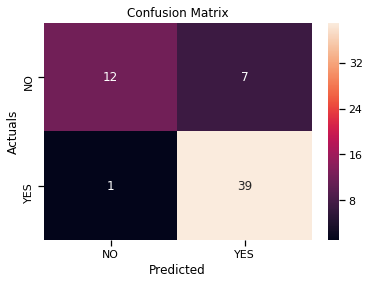

In [88]:
cm = confusion_matrix(y_test,y_testpredict)
print('Confusion matrixs for testing dataset is')
class_label = ["NO", "YES"]
prakinsondf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(prakinsondf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Confusion matrixs for training dataset is


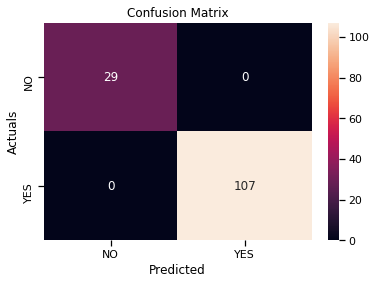

In [89]:
cm = confusion_matrix(y_train,y_trainpredict)
print('Confusion matrixs for training dataset is')
class_label = ["NO", "YES"]
prakinsondf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(prakinsondf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Though model performs very well with the training data, model performs with less accuracy in the test data, model accuracy in test is 86 % . Confusion matrix of training data shows that it predicted all the 136 (True positive , True Negative records properly ). But from the Confusion matrix of test data, we could observe that there are 12 misclassification of records.
True Negative 12 , True positive  39.
False positive : 7 , False Negative : 1

#### Regularizing the decision tree using training ,validation data and finding accuracy on the test data
using validation data to regularise the tree parameters,once the parameter values are finalised using it on test data to predict the accuracy score

In [90]:
dt = DecisionTreeClassifier(criterion = "entropy" , random_state = 1)

In [91]:
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#min_samples_leaf = [1, 2, 4]
#max_features = ['auto', 'sqrt']
#param_grid= {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'random_state':[1]} 
param_grid = {"min_samples_split": [2, 10, 20],
              "max_depth": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [5, 10, 20],
              }

#### Finding, the best parameter using Gridsearchcv with 10 fold cross validation

In [92]:
clf = GridSearchCV(estimator = dt,param_grid = param_grid, 
                          cv = 10)

In [93]:
clf.fit(X_train,y_train)
clf.best_params_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'max_depth': 10,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [94]:
best_grid = clf.best_estimator_
print(best_grid)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')


In [95]:
dTreeR = DecisionTreeClassifier(criterion = "entropy" , max_depth=5, max_leaf_nodes = 10, random_state = 1, min_samples_leaf = 2)
dTreeR.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [96]:
#predicting the  model accuracy of training  data
y_trainRpredict = dTreeR.predict(X_train)
#finding the training accuracy
score = accuracy_score(y_train,y_trainRpredict)
print('Training score is',format(score*100))

Training score is 98.52941176470588


In [97]:
#predicting the  model accuracy of training  data
y_testRpredict = dTreeR.predict(X_test)
#finding the training accuracy
score = accuracy_score(y_test,y_testRpredict)
print('Training score is',format(score*100))

Training score is 89.83050847457628


Observation : The accuracy of the score is increased to 89 percentage from 86% after optimizing the tree parameters obtained from Gridsearch, But the training accuracy is still 98 % and it is overfit model and hence high variance error. Modying min_samples_leaf to check for increase in test accuracy.The best fit parameters may differ in accuracy of the test data.

In [98]:
dTreeR = DecisionTreeClassifier(criterion = "entropy" , max_depth=5, max_leaf_nodes = 10, random_state = 1, min_samples_leaf = 5)
dTreeR.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [99]:
#predicting the  model accuracy of training  data
y_trainRpredict = dTreeR.predict(X_train)
#finding the training accuracy
score = accuracy_score(y_train,y_trainRpredict)
print('Training score for Regularized tree with 10 fold validation is:',format(score*100))

Training score for Regularized tree with 10 fold validation is: 97.05882352941177


In [100]:
#predicting the  model accuracy of training  data
y_testRpredict = dTreeR.predict(X_test)
#finding the training accuracy
score = accuracy_score(y_test,y_testRpredict)
print('testing score for Regularized tree with 10 fold validation is:',format(score*100))

testing score for Regularized tree with 10 fold validation is: 91.52542372881356


Observation : Changing min_samples_leaf has reduced the training accuracy from 98.5 % to 97% and also has increased the testing accuracy to 91%.Hence the regularized tree has helped reducing overfit model. Max_depth : 5 , min_samples_leaf: 10 ,max_leaf_nodes : 10 are the optimal value obtained from GridSearchcv

In [101]:
##finding prediction probability
prediction = dTreeR.predict_proba(X_test)

In [102]:
prediction

array([[0.        , 1.        ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [0.        , 1.        ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [0.2       , 0.8       ],
       [0.77777778, 0.22222222],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

Confusion Matirx for regularized tree

Confusion matrics for training data set is


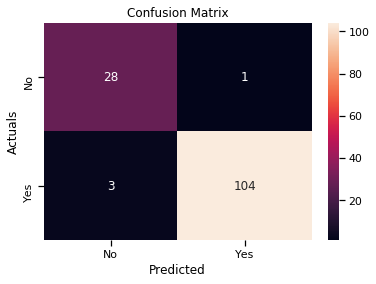

In [103]:
cm = confusion_matrix(y_train,y_trainRpredict)
print('Confusion matrics for training data set is')
class_label = ["No", "Yes"]
prakinsondf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(prakinsondf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Confusion matrics for test data set is


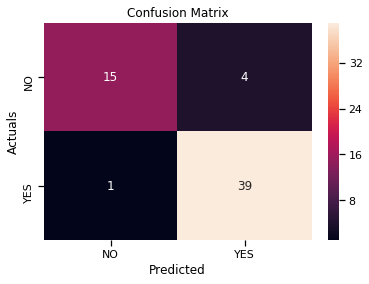

In [104]:
cm = confusion_matrix(y_test,y_testRpredict)
print('Confusion matrics for test data set is')
class_label = ["NO", "YES"]
prakinsondf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(prakinsondf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Observation : We could see improvement in prediction of data afer tuning the decision tree parameters.
True Negative: 15
True positive : 39
False positive : 4
False Negative : 1
Our aim is to get minimum false negative for Parkinson classification problem

Finding best fit parameter using 5-fold validation

In [105]:
#using 5 fold validation
clf = GridSearchCV(estimator = dt,param_grid = param_grid, 
                          cv = 5)
clf.fit(X_train,y_train)
clf.best_params_
best_grid = clf.best_estimator_
print(best_grid)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [106]:
dTreeR = DecisionTreeClassifier(criterion = "entropy" , max_depth=5, max_leaf_nodes = 10, random_state = 1, min_samples_leaf = 5)
dTreeR.fit(X_train , y_train)
y_trainpredict = dTreeR.predict(X_train)
y_predict = dTreeR.predict(X_test)
print('training Accuracy score for regularized tree using 5-fold validation is',format(accuracy_score(y_train, y_trainpredict)*100))
print('Testing Accuracy score for regularized tree using 5-fold validation is',format(accuracy_score(y_test, y_predict)*100))

training Accuracy score for regularized tree using 5-fold validation is 97.05882352941177
Testing Accuracy score for regularized tree using 5-fold validation is 91.52542372881356


Observation : The testing accuracy is increased to 91 % from 86 % after regularising the tree. For 5-fold validation best max_depth of Tree is 5 and for 10 fold validation best max_depth of tree is 10 , min_amples_leaf = 5 and maximum leaf nodes 10

In [107]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004197,4.011901e-04,0.002200,3.978752e-04,2,5,1,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5
1,0.003597,4.882557e-04,0.001598,7.993343e-04,2,5,1,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5
2,0.003398,7.997371e-04,0.001603,4.919906e-04,2,5,1,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5
3,0.003395,4.840099e-04,0.001400,4.895933e-04,2,5,5,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5
4,0.004001,6.188604e-06,0.001798,3.989948e-04,2,5,5,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5
5,0.003797,7.563047e-04,0.001599,4.892404e-04,2,5,5,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5
6,0.006390,3.260950e-03,0.002203,1.472301e-03,2,5,10,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.714286,0.892857,0.851852,0.814815,0.923077,0.838235,0.072795,31
7,0.002401,4.929966e-04,0.002005,1.267575e-03,2,5,10,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.714286,0.892857,0.851852,0.814815,0.923077,0.838235,0.072795,31
8,0.002999,1.011524e-06,0.001000,5.955694e-07,2,5,10,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.714286,0.892857,0.851852,0.814815,0.923077,0.838235,0.072795,31
9,0.002803,7.543001e-04,0.000998,1.368780e-06,2,10,1,2,"{'max_depth': 2, 'max_leaf_nodes': 10, 'min_sa...",0.785714,0.892857,0.814815,0.814815,0.923077,0.845588,0.052173,5


### Visualising Decision Tree after regularization

In [108]:
parkinson_Tree_File = open('d:\parkinson_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=parkinson_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

parkinson_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print('Feaure importance is:')
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feaure importance is:
                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.040734
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.067644
spread1           0.000000
spread2           0.000000
D2                0.079409
PPE               0.387263


In [109]:
system("dot -Tpng D:\parkinson_tree.dot -o D:/parkinson_tree.png")
Image("d:\parkinson_tree.png")

Plotting DecisionTree boundary  using mlextend for two important feature

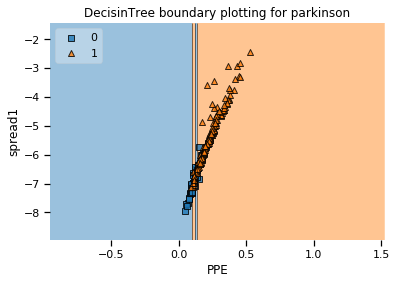

In [110]:
X2 = np.array(parkinsondf.loc[:, ['PPE','spread1']])
y2 = np.array(parkinsondf['status'])

# Training a classifier
dTree1 =  DecisionTreeClassifier(criterion = "entropy" , max_depth=5, max_leaf_nodes = 10, random_state = 1, min_samples_leaf = 5)

dTree1.fit(X2, y2)




# Plotting decision regions
plot_decision_regions(X2, y2, clf=dTree1, legend=2)

# Adding axes annotations
plt.xlabel('PPE')
plt.ylabel('spread1')
plt.title('DecisinTree boundary plotting for parkinson')
plt.show()

### Using Random Forest to find the classification of Parkinson Data

In [111]:
rf = RandomForestClassifier(random_state = 1)

In [112]:
rf.fit(X_train,y_train)
y_trainpred = rf.predict(X_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [113]:
print('Training accuracy of random forest is',format(accuracy_score(y_train,y_trainpred)*100))

Training accuracy of random forest is 100.0


In [114]:
y_testpred = rf.predict(X_test)
print('Training accuracy of random forest is',format(accuracy_score(y_test,y_testpred)*100))


Training accuracy of random forest is 89.83050847457628


Observation : Training accuracy is 100% ,hence it is overfit model. Testing accuracy is 89% . We will try to estimate the no of trees required to predict the clasification of status of parkinson data with more accuracy

#### Find the best  n-estimator for RandomForestClassifier

In [115]:
n_estimators = [1, 2,5,7,10,15,20,25,30,35,40,50]
ac_scores = []
ac_scorest = []
for i in n_estimators:
    rfR = RandomForestClassifier(criterion = "entropy" , n_estimators = i , random_state = 1)
    rfR.fit(X_train , y_train)
    y_testRpred = rfR.predict(X_test)
    scores  = accuracy_score(y_test,y_testRpred)
    ac_scores.append((scores , i))

In [116]:

print('Accuracy score using entropy is with multiple n_estimators is' , format((ac_scores)))


Accuracy score using entropy is with multiple n_estimators is [(0.6610169491525424, 1), (0.711864406779661, 2), (0.864406779661017, 5), (0.8305084745762712, 7), (0.9322033898305084, 10), (0.847457627118644, 15), (0.864406779661017, 20), (0.847457627118644, 25), (0.864406779661017, 30), (0.864406779661017, 35), (0.864406779661017, 40), (0.864406779661017, 50)]


In [117]:

print('Maximum accuracy score using entropy with optimal n_estimator  is' , format(max(ac_scores)))

Maximum accuracy score using entropy with optimal n_estimator  is (0.9322033898305084, 10)


Observation : 
* The optimal values for n_estimator is 10 for which there is testing accuracy of 93 %. RandomforestClassifier performs well with the complex model, so not defining any parameters so that the tree is complex and overfit. Each overfit tree resuts in high variance error. Multitple tree produces high variance error which cancels out each other and reduce the variance errors overall
* Complex RandomForestClassifier predicts model with 93% with 10 trees and DecisionTreeClassifier predicts model with 91% with max_depth = 5 and min_samples_leaf = 5

Confusion matrix of RandomForestClassifier is

Confusion matrics for test data set is


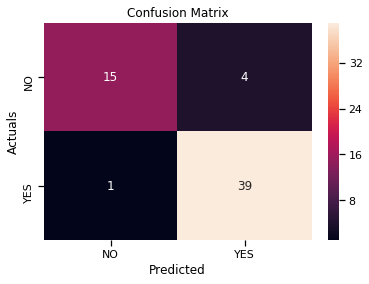

In [118]:
cm = confusion_matrix(y_test,y_testRpredict)
print('Confusion matrics for test data set is')
class_label = ["NO", "YES"]
prakinsondf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(prakinsondf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Observation:
* The confusion_matrics is same for DecionTreeClassfier and RandomForestClassifier, only the accuracy differs between these algorithm
* TP : 39 ,TN:15 ,FP : 4 ,FN :1

Finding the most important feature in RandomForestClassifier algorithm

In [119]:


parkinson_rf_File = open('d:\parkinson_rf.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=parkinson_rf_File, feature_names = list(X_train), class_names = list(train_char_label))

parkinson_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print('Feaure importance is:')
print (pd.DataFrame(rfR.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feaure importance is:
                       Imp
MDVP:Fo(Hz)       0.072974
MDVP:Fhi(Hz)      0.065493
MDVP:Flo(Hz)      0.047884
MDVP:Jitter(%)    0.030541
MDVP:Jitter(Abs)  0.007178
MDVP:RAP          0.052227
MDVP:PPQ          0.024660
Jitter:DDP        0.061254
MDVP:Shimmer      0.063144
MDVP:Shimmer(dB)  0.034236
Shimmer:APQ3      0.033674
Shimmer:APQ5      0.053780
MDVP:APQ          0.041165
Shimmer:DDA       0.033295
NHR               0.026397
HNR               0.015485
RPDE              0.027478
DFA               0.030045
spread1           0.075883
spread2           0.031259
D2                0.031535
PPE               0.140412


Observation : The most important feature is PPE

In [120]:
predictions = rfR.predict_proba(X_test)

In [121]:
predictions

array([[0.2 , 0.8 ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.68, 0.32],
       [0.  , 1.  ],
       [0.28, 0.72],
       [0.04, 0.96],
       [0.14, 0.86],
       [0.6 , 0.4 ],
       [0.22, 0.78],
       [0.56, 0.44],
       [0.84, 0.16],
       [0.02, 0.98],
       [0.12, 0.88],
       [0.14, 0.86],
       [0.74, 0.26],
       [0.02, 0.98],
       [0.32, 0.68],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.7 , 0.3 ],
       [0.1 , 0.9 ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.26, 0.74],
       [0.04, 0.96],
       [0.86, 0.14],
       [0.06, 0.94],
       [0.42, 0.58],
       [0.  , 1.  ],
       [0.3 , 0.7 ],
       [0.  , 1.  ],
       [0.08, 0.92],
       [0.94, 0.06],
       [0.04, 0.96],
       [0.4 , 0.6 ],
       [0.42, 0.58],
       [0.32, 0.68],
       [0.28, 0.72],
       [0.  , 1.  ],
       [0.76, 0.24],
       [0.26, 0.74],
       [0.06, 0.94],
       [0.12, 0.88],
       [0.  ,

In [122]:
from sklearn.datasets import make_moons
X1, y1 = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)
indices_with_replacement = np.random.randint(0, len(X_train1), len(y_train1))

   
rfR1 = RandomForestClassifier(criterion = "entropy" , n_estimators = 10 , random_state = 1)
rfR1.fit(X1[indices_with_replacement], y1[indices_with_replacement])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


Plotting RandomForestClassification using mlxtend for two important feature

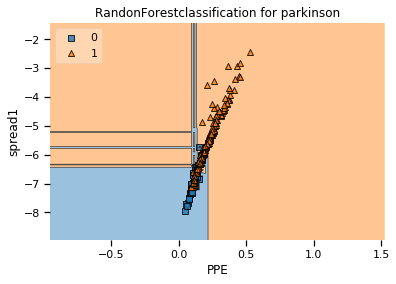

In [123]:
from mlxtend.plotting import plot_decision_regions

from sklearn import datasets

X1 = np.array(parkinsondf.loc[:, ['PPE','spread1']])
y1 = np.array(parkinsondf['status'])

# Training a classifier
rfR1 = RandomForestClassifier(criterion = "entropy" , n_estimators = 10 , random_state = 1)

rfR1.fit(X1, y1)


# Plotting decision regions
plot_decision_regions(X1, y1, clf=rfR1, legend=2)

# Adding axes annotations
plt.xlabel('PPE')
plt.ylabel('spread1')
plt.title('RandonForestclassification for parkinson')
plt.show()